Import

In [1]:
# imports for data analytics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import re

In [2]:
# import dataset in json format from data folder
# with open('data/10C_5Days_1.json','r') as f:
#     sample = json.loads(f.read())

# select between single agent or multiple agent analysis (single agent is default)
single_agent = True

if single_agent:
    # import single agent dataset in json format from data folder
    searchTerm = 'data/single_agent/*.json'
else:
    searchTerm = 'data/multiple_agent/*.json'

# read all json files in data folder with glob
files = glob.glob(searchTerm)
files

['data/single_agent\\30A_1Day_1.json',
 'data/single_agent\\30A_1Day_10.json',
 'data/single_agent\\30A_1Day_11.json',
 'data/single_agent\\30A_1Day_12.json',
 'data/single_agent\\30A_1Day_13.json',
 'data/single_agent\\30A_1Day_14.json',
 'data/single_agent\\30A_1Day_15.json',
 'data/single_agent\\30A_1Day_16.json',
 'data/single_agent\\30A_1Day_17.json',
 'data/single_agent\\30A_1Day_18.json',
 'data/single_agent\\30A_1Day_19.json',
 'data/single_agent\\30A_1Day_2.json',
 'data/single_agent\\30A_1Day_20.json',
 'data/single_agent\\30A_1Day_21.json',
 'data/single_agent\\30A_1Day_22.json',
 'data/single_agent\\30A_1Day_23.json',
 'data/single_agent\\30A_1Day_24.json',
 'data/single_agent\\30A_1Day_25.json',
 'data/single_agent\\30A_1Day_26.json',
 'data/single_agent\\30A_1Day_27.json',
 'data/single_agent\\30A_1Day_28.json',
 'data/single_agent\\30A_1Day_29.json',
 'data/single_agent\\30A_1Day_3.json',
 'data/single_agent\\30A_1Day_30.json',
 'data/single_agent\\30A_1Day_4.json',
 'da

In [3]:
# loop through all files, concatenate into three larger json files, one for each driver archetype
# this is a very inefficient way to do this, but it works for now
batches = []
driver_A_raw = []
driver_B_raw = []
driver_C_raw = []
raw_data = []

# design for single agent mode
if single_agent:
    for file in files:
        # condition to find the first letter of file name, check if it is A, B, or C
        # filename sample: 'data/single_agent\\10C_5Days_2.json'
        fileNameBreak = file.split('_') # split the file name by the backslash
        print(fileNameBreak)
        # get the character at index 8, which is the first letter of the file name
        archetype = fileNameBreak[1][-1] # A, B, or C
        batch = fileNameBreak[-1][0:-5] # 1, 2, 3, 4, or 5
        print(archetype, batch, "processing...")
        # if statement to determine which driver archetype the file belongs to
        if archetype == 'A':
            with open(file,'r') as f:
                driver_A_raw.append(json.loads(f.read()))
            batches.append(archetype + batch)
        elif archetype == 'B':
            with open(file,'r') as f:
                driver_B_raw.append(json.loads(f.read()))
            batches.append(archetype + batch)
        elif archetype == 'C':
            with open(file,'r') as f:
                driver_C_raw.append(json.loads(f.read()))
            batches.append(archetype + batch)
    
    raw_data = [driver_A_raw, driver_B_raw, driver_C_raw]
else:
    # multiple agent analysis, need to customise the code to read the files
    for file in files:
        # condition to find the first letter of file name, check if it is A, B, or C
        # filename sample: 'data/single_agent\\10C_5Days_2.json'
        fileNameBreak = file.split('_') # split the file name by the backslash
        # get the character at index 8, which is the first letter of the file name
        archetypes = []
        print (fileNameBreak)
        for i in range(8, len(fileNameBreak[1])):
            archetypes.append(fileNameBreak[1][i]) # append from first cut of filename, loop through for A, B, and/or C after "10..."
        batch = fileNameBreak[3][0:-5] # 1, 2, 3, 4, or 5

        print("with",archetypes, batch, "inside multi agent file, processing...")
        with open(file,'r') as f:
            raw_data.append(json.loads(f.read()))
        [batches.append(archetype + batch) for archetype in archetypes]

print("Batches registered:", batches)

['data/single', 'agent\\30A', '1Day', '1.json']
A 1 processing...
['data/single', 'agent\\30A', '1Day', '10.json']
A 10 processing...
['data/single', 'agent\\30A', '1Day', '11.json']
A 11 processing...
['data/single', 'agent\\30A', '1Day', '12.json']
A 12 processing...
['data/single', 'agent\\30A', '1Day', '13.json']
A 13 processing...
['data/single', 'agent\\30A', '1Day', '14.json']
A 14 processing...
['data/single', 'agent\\30A', '1Day', '15.json']
A 15 processing...
['data/single', 'agent\\30A', '1Day', '16.json']
A 16 processing...
['data/single', 'agent\\30A', '1Day', '17.json']
A 17 processing...
['data/single', 'agent\\30A', '1Day', '18.json']
A 18 processing...
['data/single', 'agent\\30A', '1Day', '19.json']
A 19 processing...
['data/single', 'agent\\30A', '1Day', '2.json']
A 2 processing...
['data/single', 'agent\\30A', '1Day', '20.json']
A 20 processing...
['data/single', 'agent\\30A', '1Day', '21.json']
A 21 processing...
['data/single', 'agent\\30A', '1Day', '22.json']
A 2

In [4]:
# driver_A_raw[0] # is a list, encasing a dictionary with starting keys of 'key' and 'log'

In [5]:
# raw_data

In [6]:
if len(raw_data) > 1:
    # flatten the list of lists
    for batch in raw_data:
        flat_raw = [item for sublist in batch for item in sublist] # [['key': 'A0', 'log':{...}], ['key': 'A1', 'log':{...}], ['key': 'An', 'log':{...}]]  --> remove inner list that encased each dictionary, bring lvl3 scope to lvl2, which is a list of dictionaries
        batch = flat_raw

In [7]:
if len(raw_data) > 1:
    for batch in raw_data:
        print(len(batch), "number of simulation runs, now in jsons under an archetype")
        for listAgain in batch:
            print(len(listAgain), "drivers in this simulation run")
else:
    print("1 number of simulation run, now in a json under several archetypes")
    print(len(raw_data[0]), "drivers in this simulation run")

30 number of simulation runs, now in jsons under an archetype
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this simulation run
30 drivers in this s

In [8]:
# remember you can only run this once, because it will keep modifying the keys
# replace driver key archetype with respective batch number
idx = 0

if len(raw_data) > 1:
    if single_agent:
        
        for file in raw_data: # [driver_A, driver_B, driver_C]
            print("Checking how many files:", len(file), "and batchs of archetype(s) registered:", batches) # should be 30, 30, 30 because flattened earlier
            for batch in file: # driver['key'] should turn from A1, A2, A3, etc. to A11, A12, A13, etc.
                for driver in batch:
                    print("before changing:", driver['key'])
                    driver['key'] = batches[idx] + driver['key'][1:] # batches[idx] can be done because trusted that the file archtypes were already sorted by file explorer in listing order, and filenames were standardised
                    print("after changing:", driver['key'])
                idx += 1
    else:
        print("yeah, maybe multiple agent mode with multiple files is not ready yet")

Checking how many files: 30 and batchs of archetype(s) registered: ['A1', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A3', 'A30', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B3', 'B30', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C2', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
before changing: A0
after changing: A10
before changing: A1
after changing: A11
before changing: A2
after changing: A12
before changing: A3
after changing: A13
before changing: A4
after changing: A14
before changing: A5
after changing: A15
before changing: A6
after changing: A16
before changing: A7
after changing: A17
before ch

In [9]:
seraph = {}

In [10]:
category = 'earnings'

# tailor the dataframe to a subset that concentrates on the driver's earnings
# initialise a key finding in seraph
seraph[category] = {
    'archetype': {},
    'driver': {},
    'trip_id': {},
    'starttime': {},
    'transitstart': {},
    'endtime': {},
    'profit': {}
}

idx = 0

print(f"Building seraph[{category}]...")

if len(raw_data) > 1:
    for archetype in raw_data: # [driver_A, driver_B, driver_C]
        print(len(archetype)) # [3] archetypes * 3 * 10
        for batch in archetype: # 3 * [3] different runs * 10
            for driver in batch: # 3 * 3 * [10] drivers in each run
                print(driver['key']) # driver is a dictionary, key is the driver id
                print("total number of trips made by driver before updating: ", len(driver['log']))
                sorter = driver['key'][0] # A, B, or C
                for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
                    seraph[category]['archetype'][idx] = sorter
                    seraph[category]['driver'][idx] = driver['key']
                    seraph[category]['trip_id'][idx] = trip_id
                    try:
                        searchslack = journey['searching']['time spent']
                    except:
                        searchslack = 0
                    seraph[category]['starttime'][idx] = journey['searching']['current time'] - searchslack
                    seraph[category]['endtime'][idx] = journey['transit']['current time']
                    try:
                        transitslack = len(journey['transit']['speed'])
                    except:
                        transitslack = 0
                    seraph[category]['transitstart'][idx] = journey['transit']['current time'] - transitslack
                    seraph[category]['profit'][idx] = journey['totals']['profit']
                    idx += 1
else:
    for driver in raw_data[0]: # [3] archetypes * [3] different runs * [10] drivers in each run
        print(driver['key']) # driver is a dictionary, key is the driver id
        print("total number of trips made by driver before updating: ", len(driver['log']))
        sorter = driver['key'][0] # A, B, or C
        for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
            seraph[category]['archetype'][idx] = sorter
            seraph[category]['driver'][idx] = driver['key']
            seraph[category]['trip_id'][idx] = trip_id
            try:
                searchslack = journey['searching']['time spent']
            except:
                searchslack = 0
            seraph[category]['starttime'][idx] = journey['searching']['current time'] - searchslack
            seraph[category]['endtime'][idx] = journey['transit']['current time']
            try:
                transitslack = len(journey['transit']['speed'])
            except:
                transitslack = 0
            seraph[category]['transitstart'][idx] = journey['transit']['current time'] - transitslack
            seraph[category]['profit'][idx] = journey['totals']['profit']
            idx += 1

Building seraph[earnings]...
30
A10
total number of trips made by driver before updating:  41
A11
total number of trips made by driver before updating:  38
A12
total number of trips made by driver before updating:  37
A13
total number of trips made by driver before updating:  44
A14
total number of trips made by driver before updating:  37
A15
total number of trips made by driver before updating:  38
A16
total number of trips made by driver before updating:  40
A17
total number of trips made by driver before updating:  38
A18
total number of trips made by driver before updating:  41
A19
total number of trips made by driver before updating:  38
A110
total number of trips made by driver before updating:  38
A111
total number of trips made by driver before updating:  37
A112
total number of trips made by driver before updating:  41
A113
total number of trips made by driver before updating:  38
A114
total number of trips made by driver before updating:  40
A115
total number of trips made b

In [11]:
for attr, content in seraph['earnings'].items():
        print(attr, len(content))
        if attr == 'driver':
            print(content)

archetype 94174
driver 94174
{0: 'A10', 1: 'A10', 2: 'A10', 3: 'A10', 4: 'A10', 5: 'A10', 6: 'A10', 7: 'A10', 8: 'A10', 9: 'A10', 10: 'A10', 11: 'A10', 12: 'A10', 13: 'A10', 14: 'A10', 15: 'A10', 16: 'A10', 17: 'A10', 18: 'A10', 19: 'A10', 20: 'A10', 21: 'A10', 22: 'A10', 23: 'A10', 24: 'A10', 25: 'A10', 26: 'A10', 27: 'A10', 28: 'A10', 29: 'A10', 30: 'A10', 31: 'A10', 32: 'A10', 33: 'A10', 34: 'A10', 35: 'A10', 36: 'A10', 37: 'A10', 38: 'A10', 39: 'A10', 40: 'A10', 41: 'A11', 42: 'A11', 43: 'A11', 44: 'A11', 45: 'A11', 46: 'A11', 47: 'A11', 48: 'A11', 49: 'A11', 50: 'A11', 51: 'A11', 52: 'A11', 53: 'A11', 54: 'A11', 55: 'A11', 56: 'A11', 57: 'A11', 58: 'A11', 59: 'A11', 60: 'A11', 61: 'A11', 62: 'A11', 63: 'A11', 64: 'A11', 65: 'A11', 66: 'A11', 67: 'A11', 68: 'A11', 69: 'A11', 70: 'A11', 71: 'A11', 72: 'A11', 73: 'A11', 74: 'A11', 75: 'A11', 76: 'A11', 77: 'A11', 78: 'A11', 79: 'A12', 80: 'A12', 81: 'A12', 82: 'A12', 83: 'A12', 84: 'A12', 85: 'A12', 86: 'A12', 87: 'A12', 88: 'A12', 8

In [12]:
earnings_df = pd.DataFrame(seraph['earnings'])

In [13]:
earnings_df[0:40]

archetype driver trip_id    starttime  transitstart  endtime     profit
0          A    A10       1    61.000000            64       74   5.185360
1          A    A10       2    77.000000            78       87   4.807104
2          A    A10       3    90.000000            98       99   1.496480
3          A    A10       4    99.000000           105      106   1.496480
4          A    A10       5   108.000000           108      111   3.232887
5          A    A10       6   113.000000           115      121   4.238830
6          A    A10       7   122.000000           125      131   3.872341
7          A    A10       8   133.000000           135      156   9.006608
8          A    A10       9   157.000000           160      184   9.954108
9          A    A10      10   185.000000           190      191   1.747360
10         A    A10      11   192.000000           196      213   7.281383
11         A    A10      12   216.435168           224      225   0.853015
12         A    A10      13   226.000000           229      254   9.849228
13         A    A10      14  1021.000000          1021     1035  11.887437
14         A    A10      15  1037.000000          1037     1041   5.783193
15         A    A10      16  1046.000000          1052     1053   2.896480
16         A    A10      17  1057.000000          1056     1069  11.483482
17         A    A10      18  1070.000000          1073     1091  14.724949
18         A    A10      19  1092.000000          1096     1110  11.114144
19         A    A10      20  1112.000000          1114     1122   8.179479
20         A    A10      21  1123.000000          1124     1134   9.621124
21         A    A10      22  1135.000000          1137     1151  12.056355
22         A    A10      23  1151.000000          1153     1163   9.290503
23         A    A10      24  1164.000000          1168     1184  13.256519
24         A    A10      25  1186.000000          1189     1204  12.760729
25         A    A10      26  1204.000000          1207     1213   7.248383
26         A    A10      27  1215.000000          1217     1236  16.284018
27         A    A10      28  1236.000000          1238     1264  21.109181
28         A    A10      29  1266.000000          1265     1273   4.758716
29         A    A10      30  1277.000000          1277     1287   4.944012
30         A    A10      31  1290.000000          1294     1306   6.141487
31         A    A10      32  1308.000000          1310     1325   7.275134
32         A    A10      33  1327.000000          1331     1332   2.201333
33         A    A10      34  1334.000000          1336     1337   2.201333
34         A    A10      35  1338.000000          1342     1343   2.201333
35         A    A10      36  1348.000000          1353     1354   1.305333
36         A    A10      37  1355.000000          1357     1366   5.100453
37         A    A10      38  1369.000000          1368     1375   3.808420
38         A    A10      39  1376.000000          1380     1384   3.165950
39         A    A10      40  1387.864835          1405     1416   2.531146

In [14]:
# earnings_df[earnings_df['state'] == "searching" & earnings_df['time spent'] > 10].describe()

In [15]:
eachTripEarnings = earnings_df[earnings_df['endtime'] - earnings_df['transitstart'] > 0]
print(eachTripEarnings['profit'].describe())
# frequency of profits below 0
# print("frequency of profits below 0: ", len(eachTripEarnings[eachTripEarnings['profit'] < 0]), "out of", len(eachTripEarnings), "trips")
# print("percentage of profits below 0: ", len(eachTripEarnings[eachTripEarnings['profit'] < 0]) / len(eachTripEarnings) * 100, "%")
# boxPlotbyTripofEachDriver = eachTripEarnings.boxplot(column=['profit'], by=['driver'], figsize=(12, 4))
# boxPlotbyTripofEachDriver.set_title("")
# boxPlotbyTripofEachDriver.set_xlabel("Drivers")
# boxPlotbyTripofEachDriver.set_ylabel("Earnings ($)")
# boxPlotbyTripofEachDriver.set_xticklabels([])

count    94174.000000
mean         8.071644
std          4.684839
min         -8.476297
25%          4.709484
50%          7.213902
75%         10.707318
max         32.410537
Name: profit, dtype: float64


In [16]:
eachDriverEarnings = earnings_df[['profit', 'driver', 'archetype']].groupby('driver').sum() # sum up the profits for each driver [now 3 * 10 drivers]

eachDriverEarnings[0:10]

profit                                       archetype
driver                                                            
A10     282.325843       AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
A100    314.245346  AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
A101    293.929886            AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
A1010   290.901645         AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
A1011   295.113355       AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
A1012   280.232929         AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
A1013   297.980622          AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
A1014   304.650236   AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
A1015   299.628760         AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
A1016   289.751486        AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [17]:
# eachDriverEarnings = earnings_df[['profit', 'driver', 'archetype']].groupby('driver').sum() # sum up the profits for each driver [now 3 * 10 drivers]

# change value in eachDriverEarnings['archetype'] to the first letter of the driver id
for letter in ['A', 'B', 'C']:
    eachDriverEarnings.loc[eachDriverEarnings['archetype'].str.contains(letter), 'archetype'] = letter

# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                    #    'display.precision', 3,
                       ):
    print(eachDriverEarnings)

            profit archetype
driver                      
A10     282.325843         A
A100    314.245346         A
A101    293.929886         A
A1010   290.901645         A
A1011   295.113355         A
A1012   280.232929         A
A1013   297.980622         A
A1014   304.650236         A
A1015   299.628760         A
A1016   289.751486         A
A1017   292.271434         A
A1018   318.008978         A
A1019   297.756216         A
A102    293.827752         A
A1020   300.257342         A
A1021   305.996501         A
A1022   298.532507         A
A1023   309.689406         A
A1024   288.096944         A
A1025   296.624300         A
A1026   285.105843         A
A1027   309.444217         A
A1028   291.828815         A
A1029   296.534102         A
A103    294.610019         A
A104    290.905008         A
A105    272.341518         A
A106    303.158416         A
A107    285.961440         A
A108    305.626971         A
A109    289.910394         A
A11     267.634120         A
A110    581.97

In [18]:
# describe the earnings of each archetype
for letter in ['A', 'B', 'C']:
    print("archetype", letter, "daily earnings")
    print('------------------------------------')
    print(eachDriverEarnings[eachDriverEarnings['archetype'] == letter]['profit'].describe())
    print('This lowest earning a driver in archetype', letter, 'would make $%.2f' % (eachDriverEarnings[eachDriverEarnings['archetype'] == letter]['profit'].min() * 20), '/ month, given 20 workings days')
    print('On average, a driver in archetype', letter, 'would make $%.2f' % (eachDriverEarnings[eachDriverEarnings['archetype'] == letter]['profit'].mean() * 20), '/ month, given 20 workings days')

# frequency of profits below 0
print("frequency of profits below 0: ", len(eachDriverEarnings[eachDriverEarnings['profit'] < 0]), "out of", len(eachDriverEarnings), "drivers")
try:
    loserDriverRatio = len(eachDriverEarnings[eachDriverEarnings['profit'] < 0]) / len(eachDriverEarnings)
except ZeroDivisionError:
    loserDriverRatio = 0
print("percentage of profits below 0: ", loserDriverRatio * 100, "%")

archetype A daily earnings
------------------------------------
count    860.000000
mean     304.044325
std       59.951387
min      190.908628
25%      286.418053
50%      294.504193
75%      301.674813
max      610.772931
Name: profit, dtype: float64
This lowest earning a driver in archetype A would make $3818.17 / month, given 20 workings days
On average, a driver in archetype A would make $6080.89 / month, given 20 workings days
archetype B daily earnings
------------------------------------
count    860.000000
mean     310.896028
std       76.998895
min      193.357017
25%      264.427916
50%      300.720114
75%      333.018900
max      672.257452
Name: profit, dtype: float64
This lowest earning a driver in archetype B would make $3867.14 / month, given 20 workings days
On average, a driver in archetype B would make $6217.92 / month, given 20 workings days
archetype C daily earnings
------------------------------------
count    860.000000
mean     268.942171
std       57.061528
mi

Earnings

Text(0, 0.5, 'Earnings ($)')

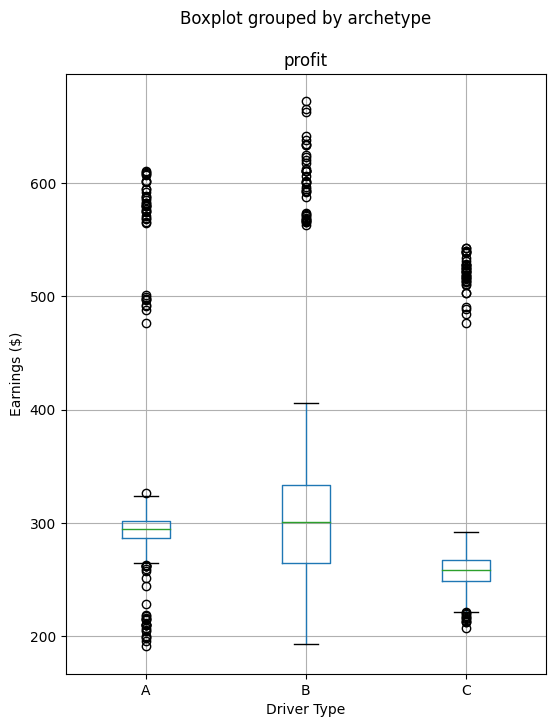

In [19]:
boxPlotbyDriverofEachArchetype = eachDriverEarnings.boxplot(column=['profit'], by=['archetype'], figsize=(6, 8))
# boxPlotbyDriverofEachArchetype.set_title("Earnings of Each Driver by Type")
boxPlotbyDriverofEachArchetype.set_xlabel("Driver Type")
boxPlotbyDriverofEachArchetype.set_ylabel("Earnings ($)")

In [20]:
peakOne = range(420, 600) # 7am - 10am
peakTwo = range(1020, 1200) # 5pm - 8pm

In [21]:
# assign peak or off-peak to each trip if the trip is within the peak hours
eachTripEarnings['peak'] = np.where(eachTripEarnings['transitstart'].isin(peakOne) | eachTripEarnings['transitstart'].isin(peakTwo), 'peak', 'npeak')

In [22]:
eachTripEarnings[0:40]

archetype driver trip_id    starttime  transitstart  endtime     profit   
0          A    A10       1    61.000000            64       74   5.185360  \
1          A    A10       2    77.000000            78       87   4.807104   
2          A    A10       3    90.000000            98       99   1.496480   
3          A    A10       4    99.000000           105      106   1.496480   
4          A    A10       5   108.000000           108      111   3.232887   
5          A    A10       6   113.000000           115      121   4.238830   
6          A    A10       7   122.000000           125      131   3.872341   
7          A    A10       8   133.000000           135      156   9.006608   
8          A    A10       9   157.000000           160      184   9.954108   
9          A    A10      10   185.000000           190      191   1.747360   
10         A    A10      11   192.000000           196      213   7.281383   
11         A    A10      12   216.435168           224      225   0.853015   
12         A    A10      13   226.000000           229      254   9.849228   
13         A    A10      14  1021.000000          1021     1035  11.887437   
14         A    A10      15  1037.000000          1037     1041   5.783193   
15         A    A10      16  1046.000000          1052     1053   2.896480   
16         A    A10      17  1057.000000          1056     1069  11.483482   
17         A    A10      18  1070.000000          1073     1091  14.724949   
18         A    A10      19  1092.000000          1096     1110  11.114144   
19         A    A10      20  1112.000000          1114     1122   8.179479   
20         A    A10      21  1123.000000          1124     1134   9.621124   
21         A    A10      22  1135.000000          1137     1151  12.056355   
22         A    A10      23  1151.000000          1153     1163   9.290503   
23         A    A10      24  1164.000000          1168     1184  13.256519   
24         A    A10      25  1186.000000          1189     1204  12.760729   
25         A    A10      26  1204.000000          1207     1213   7.248383   
26         A    A10      27  1215.000000          1217     1236  16.284018   
27         A    A10      28  1236.000000          1238     1264  21.109181   
28         A    A10      29  1266.000000          1265     1273   4.758716   
29         A    A10      30  1277.000000          1277     1287   4.944012   
30         A    A10      31  1290.000000          1294     1306   6.141487   
31         A    A10      32  1308.000000          1310     1325   7.275134   
32         A    A10      33  1327.000000          1331     1332   2.201333   
33         A    A10      34  1334.000000          1336     1337   2.201333   
34         A    A10      35  1338.000000          1342     1343   2.201333   
35         A    A10      36  1348.000000          1353     1354   1.305333   
36         A    A10      37  1355.000000          1357     1366   5.100453   
37         A    A10      38  1369.000000          1368     1375   3.808420   
38         A    A10      39  1376.000000          1380     1384   3.165950   
39         A    A10      40  1387.864835          1405     1416   2.531146   

     peak  
0   npeak  
1   npeak  
2   npeak  
3   npeak  
4   npeak  
5   npeak  
6   npeak  
7   npeak  
8   npeak  
9   npeak  
10  npeak  
11  npeak  
12  npeak  
13   peak  
14   peak  
15   peak  
16   peak  
17   peak  
18   peak  
19   peak  
20   peak  
21   peak  
22   peak  
23   peak  
24   peak  
25  npeak  
26  npeak  
27  npeak  
28  npeak  
29  npeak  
30  npeak  
31  npeak  
32  npeak  
33  npeak  
34  npeak  
35  npeak  
36  npeak  
37  npeak  
38  npeak  
39  npeak

In [23]:
for letter in ['A', 'B', 'C']:
    print('------------------------------------')
    print("archetype", letter, "peak multiplier")
    print('------------------------------------')
    peakProfit = eachTripEarnings[(eachTripEarnings['archetype'] == letter) & (eachTripEarnings['peak'] == 'peak')]['profit'].mean()
    npeakProfit = eachTripEarnings[(eachTripEarnings['archetype'] == letter) & (eachTripEarnings['peak'] == 'npeak')]['profit'].mean()
    print("peak average profit: ", peakProfit)
    print("non-peak average profit: ", npeakProfit)
    print("peak multiplier: ", peakProfit / npeakProfit)

------------------------------------
archetype A peak multiplier
------------------------------------
peak average profit:  10.998757581071558
non-peak average profit:  5.633503141898142
peak multiplier:  1.9523833224251397
------------------------------------
archetype B peak multiplier
------------------------------------
peak average profit:  10.865924658338995
non-peak average profit:  5.062005716652
peak multiplier:  2.1465650705597574
------------------------------------
archetype C peak multiplier
------------------------------------
peak average profit:  11.515885012939586
non-peak average profit:  7.151745311448183
peak multiplier:  1.6102202345636514


In [24]:
category = 'customers'

# tailor the dataframe to a subset that concentrates on the driver's time series growth of customers
# initialise a key finding in seraph
seraph[category] = {
    'archetype': {},
    'driver': {},
    'trip_id': {},
    'starttime': {},
    'endtime': {},
}

idx = 0

print(f"Building seraph[{category}]...")

if len(raw_data) > 1:
    for archetype in raw_data: # [driver_A, driver_B, driver_C]
        print(len(archetype)) # [3] archetypes * 3 * 10
        for batch in archetype: # 3 * [3] different runs * 10
            for driver in batch: # 3 * 3 * [10] drivers in each run
                print(driver['key']) # driver is a dictionary, key is the driver id
                print("total number of trips made by driver before updating: ", len(driver['log']))
                sorter = driver['key'][0] # A, B, or C
                for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
                    seraph[category]['archetype'][idx] = driver['key'][0]
                    seraph[category]['driver'][idx] = driver['key']
                    seraph[category]['trip_id'][idx] = trip_id
                    try:
                        searchslack = journey['searching']['time spent']
                    except:
                        searchslack = 0
                    seraph[category]['starttime'][idx] = journey['searching']['current time'] - searchslack
                    seraph[category]['endtime'][idx] = journey['transit']['current time']
                    idx += 1
else:
    for driver in raw_data[0]: # [3] archetypes * [3] different runs * [10] drivers in each run
        print(driver['key']) # driver is a dictionary, key is the driver id
        print("total number of trips made by driver before updating: ", len(driver['log']))
        sorter = driver['key'][0] # A, B, or C
        for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
            seraph[category]['archetype'][idx] = driver['key'][0]
            seraph[category]['driver'][idx] = driver['key']
            seraph[category]['trip_id'][idx] = trip_id
            try:
                searchslack = journey['searching']['time spent']
            except:
                searchslack = 0
            seraph[category]['starttime'][idx] = journey['searching']['current time'] - searchslack
            seraph[category]['endtime'][idx] = journey['transit']['current time']
            idx += 1

Building seraph[customers]...
30
A10
total number of trips made by driver before updating:  41
A11
total number of trips made by driver before updating:  38
A12
total number of trips made by driver before updating:  37
A13
total number of trips made by driver before updating:  44
A14
total number of trips made by driver before updating:  37
A15
total number of trips made by driver before updating:  38
A16
total number of trips made by driver before updating:  40
A17
total number of trips made by driver before updating:  38
A18
total number of trips made by driver before updating:  41
A19
total number of trips made by driver before updating:  38
A110
total number of trips made by driver before updating:  38
A111
total number of trips made by driver before updating:  37
A112
total number of trips made by driver before updating:  41
A113
total number of trips made by driver before updating:  38
A114
total number of trips made by driver before updating:  40
A115
total number of trips made 

In [25]:
customers_df = pd.DataFrame(seraph['customers'])

customers_df

archetype driver trip_id  starttime  endtime
0             A    A10       1       61.0       74
1             A    A10       2       77.0       87
2             A    A10       3       90.0       99
3             A    A10       4       99.0      106
4             A    A10       5      108.0      111
...         ...    ...     ...        ...      ...
94169         C   C929      33      989.0     1003
94170         C   C929      34     1005.0     1037
94171         C   C929      35     1039.0     1058
94172         C   C929      36     1060.0     1067
94173         C   C929      37     1069.0     1093

[94174 rows x 5 columns]

In [26]:
# build a column of timestamps using seraph['customers']['endtime'] for customers_df, with a frequency of 1 minute, and a start time of 0, timeline from 2023-01-01 00:00:00 onwards
customers_df['timestamp'] = pd.to_datetime(customers_df['endtime'], unit='m', origin='2023-01-01 00:00:00')

customers_df

archetype driver trip_id  starttime  endtime           timestamp
0             A    A10       1       61.0       74 2023-01-01 01:14:00
1             A    A10       2       77.0       87 2023-01-01 01:27:00
2             A    A10       3       90.0       99 2023-01-01 01:39:00
3             A    A10       4       99.0      106 2023-01-01 01:46:00
4             A    A10       5      108.0      111 2023-01-01 01:51:00
...         ...    ...     ...        ...      ...                 ...
94169         C   C929      33      989.0     1003 2023-01-01 16:43:00
94170         C   C929      34     1005.0     1037 2023-01-01 17:17:00
94171         C   C929      35     1039.0     1058 2023-01-01 17:38:00
94172         C   C929      36     1060.0     1067 2023-01-01 17:47:00
94173         C   C929      37     1069.0     1093 2023-01-01 18:13:00

[94174 rows x 6 columns]

In [27]:
# so in time series:
# 420 - 600 [Day 1 peak 1]
# 1020 - 1200 [Day 1 peak 2]
# 1860 - 2040 [Day 2 peak 1]
# 2460 - 2640 [Day 2 peak 2]
# 3300 - 3480 [Day 3 peak 1]
# 3900 - 4080 [Day 3 peak 2]
# 4740 - 4920 [Day 4 peak 1]
# 5340 - 5520 [Day 4 peak 2]
# 6180 - 6360 [Day 5 peak 1]
# 6780 - 6960 [Day 5 peak 2]

In [28]:
# build a column tracking and updating number of customers each driver has picked up thus far
customers_df['customers'] = 1

In [29]:
customers_df

archetype driver trip_id  starttime  endtime           timestamp   
0             A    A10       1       61.0       74 2023-01-01 01:14:00  \
1             A    A10       2       77.0       87 2023-01-01 01:27:00   
2             A    A10       3       90.0       99 2023-01-01 01:39:00   
3             A    A10       4       99.0      106 2023-01-01 01:46:00   
4             A    A10       5      108.0      111 2023-01-01 01:51:00   
...         ...    ...     ...        ...      ...                 ...   
94169         C   C929      33      989.0     1003 2023-01-01 16:43:00   
94170         C   C929      34     1005.0     1037 2023-01-01 17:17:00   
94171         C   C929      35     1039.0     1058 2023-01-01 17:38:00   
94172         C   C929      36     1060.0     1067 2023-01-01 17:47:00   
94173         C   C929      37     1069.0     1093 2023-01-01 18:13:00   

       customers  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
94169          1  
94170          1  
94171          1  
94172          1  
94173          1  

[94174 rows x 7 columns]

In [30]:
# group the data by driver and timestamp index, and sum up the number of customers each driver has picked up at each timestamp
eachDriverCustomers = customers_df.groupby(['driver', pd.Grouper(key='timestamp')])['customers'].sum().unstack()

eachDriverCustomers

timestamp  2023-01-01 01:03:00  2023-01-01 01:04:00  2023-01-01 01:05:00   
driver                                                                     
A10                        NaN                  NaN                  NaN  \
A100                       NaN                  NaN                  NaN   
A101                       NaN                  NaN                  NaN   
A1010                      NaN                  NaN                  NaN   
A1011                      NaN                  NaN                  NaN   
...                        ...                  ...                  ...   
C95                        NaN                  NaN                  NaN   
C96                        NaN                  NaN                  NaN   
C97                        NaN                  NaN                  NaN   
C98                        NaN                  NaN                  NaN   
C99                        NaN                  NaN                  NaN   

timestamp  2023-01-01 01:06:00  2023-01-01 01:07:00  2023-01-01 01:08:00   
driver                                                                     
A10                        NaN                  NaN                  NaN  \
A100                       NaN                  NaN                  1.0   
A101                       NaN                  NaN                  NaN   
A1010                      NaN                  NaN                  1.0   
A1011                      NaN                  NaN                  NaN   
...                        ...                  ...                  ...   
C95                        NaN                  NaN                  NaN   
C96                        NaN                  NaN                  NaN   
C97                        NaN                  NaN                  NaN   
C98                        NaN                  NaN                  NaN   
C99                        NaN                  NaN                  NaN   

timestamp  2023-01-01 01:09:00  2023-01-01 01:10:00  2023-01-01 01:11:00   
driver                                                                     
A10                        NaN                  NaN                  NaN  \
A100                       NaN                  NaN                  NaN   
A101                       NaN                  NaN                  NaN   
A1010                      NaN                  NaN                  NaN   
A1011                      1.0                  NaN                  NaN   
...                        ...                  ...                  ...   
C95                        NaN                  NaN                  NaN   
C96                        NaN                  NaN                  NaN   
C97                        NaN                  NaN                  NaN   
C98                        NaN                  NaN                  NaN   
C99                        NaN                  NaN                  NaN   

timestamp  2023-01-01 01:12:00  ...  2023-01-01 23:50:00  2023-01-01 23:51:00   
driver                          ...                                             
A10                        NaN  ...                  NaN                  NaN  \
A100                       NaN  ...                  NaN                  NaN   
A101                       NaN  ...                  1.0                  NaN   
A1010                      NaN  ...                  NaN                  NaN   
A1011                      NaN  ...                  1.0                  NaN   
...                        ...  ...                  ...                  ...   
C95                        NaN  ...                  NaN                  NaN   
C96                        NaN  ...                  NaN                  NaN   
C97                        NaN  ...                  NaN                  NaN   
C98                        NaN  ...                  NaN                  NaN   
C99                        NaN  ...                  NaN     

In [31]:
# collapse the timestamp columns into columns of 30-minute intervals
eachDriverCustomers = eachDriverCustomers.resample('30T', axis=1).sum()

eachDriverCustomers

timestamp  2023-01-01 01:00:00  2023-01-01 01:30:00  2023-01-01 02:00:00   
driver                                                                     
A10                        2.0                  3.0                  2.0  \
A100                       2.0                  2.0                  1.0   
A101                       1.0                  3.0                  1.0   
A1010                      2.0                  3.0                  2.0   
A1011                      2.0                  3.0                  1.0   
...                        ...                  ...                  ...   
C95                        0.0                  0.0                  0.0   
C96                        0.0                  0.0                  0.0   
C97                        0.0                  0.0                  0.0   
C98                        0.0                  0.0                  0.0   
C99                        0.0                  0.0                  0.0   

timestamp  2023-01-01 02:30:00  2023-01-01 03:00:00  2023-01-01 03:30:00   
driver                                                                     
A10                        1.0                  2.0                  2.0  \
A100                       1.0                  3.0                  3.0   
A101                       2.0                  2.0                  1.0   
A1010                      2.0                  3.0                  2.0   
A1011                      2.0                  1.0                  2.0   
...                        ...                  ...                  ...   
C95                        0.0                  0.0                  0.0   
C96                        0.0                  0.0                  0.0   
C97                        0.0                  0.0                  0.0   
C98                        0.0                  0.0                  0.0   
C99                        0.0                  0.0                  0.0   

timestamp  2023-01-01 04:00:00  2023-01-01 04:30:00  2023-01-01 05:00:00   
driver                                                                     
A10                        1.0                  0.0                  0.0  \
A100                       1.0                  0.0                  0.0   
A101                       1.0                  0.0                  0.0   
A1010                      1.0                  0.0                  0.0   
A1011                      0.0                  0.0                  0.0   
...                        ...                  ...                  ...   
C95                        0.0                  0.0                  0.0   
C96                        0.0                  0.0                  0.0   
C97                        0.0                  0.0                  0.0   
C98                        0.0                  0.0                  0.0   
C99                        0.0                  0.0                  0.0   

timestamp  2023-01-01 05:30:00  ...  2023-01-01 19:00:00  2023-01-01 19:30:00   
driver                          ...                                             
A10                        0.0  ...                  2.0                  1.0  \
A100                       0.0  ...                  3.0                  2.0   
A101                       0.0  ...                  2.0                  1.0   
A1010                      0.0  ...                  1.0                  1.0   
A1011                      0.0  ...                  2.0                  3.0   
...                        ...  ...                  ...                  ...   
C95                        0.0  ...                  0.0                  0.0   
C96                        0.0  ...                  0.0                  0.0   
C97                        0.0  ...                  0.0                  0.0   
C98                        0.0  ...                  0.0                  0.0   
C99                        0.0  ...                  0.0     

In [32]:
for driver, timevalues in eachDriverCustomers.iterrows(): # looping through each driver
    customers_tracking = 0
    for index, customer_count in enumerate(timevalues):
        customers_tracking = customers_tracking + customer_count
        eachDriverCustomers.at[driver, eachDriverCustomers.columns[index]] = customers_tracking

In [33]:
eachDriverCustomers

timestamp  2023-01-01 01:00:00  2023-01-01 01:30:00  2023-01-01 02:00:00   
driver                                                                     
A10                        2.0                  5.0                  7.0  \
A100                       2.0                  4.0                  5.0   
A101                       1.0                  4.0                  5.0   
A1010                      2.0                  5.0                  7.0   
A1011                      2.0                  5.0                  6.0   
...                        ...                  ...                  ...   
C95                        0.0                  0.0                  0.0   
C96                        0.0                  0.0                  0.0   
C97                        0.0                  0.0                  0.0   
C98                        0.0                  0.0                  0.0   
C99                        0.0                  0.0                  0.0   

timestamp  2023-01-01 02:30:00  2023-01-01 03:00:00  2023-01-01 03:30:00   
driver                                                                     
A10                        8.0                 10.0                 12.0  \
A100                       6.0                  9.0                 12.0   
A101                       7.0                  9.0                 10.0   
A1010                      9.0                 12.0                 14.0   
A1011                      8.0                  9.0                 11.0   
...                        ...                  ...                  ...   
C95                        0.0                  0.0                  0.0   
C96                        0.0                  0.0                  0.0   
C97                        0.0                  0.0                  0.0   
C98                        0.0                  0.0                  0.0   
C99                        0.0                  0.0                  0.0   

timestamp  2023-01-01 04:00:00  2023-01-01 04:30:00  2023-01-01 05:00:00   
driver                                                                     
A10                       13.0                 13.0                 13.0  \
A100                      13.0                 13.0                 13.0   
A101                      11.0                 11.0                 11.0   
A1010                     15.0                 15.0                 15.0   
A1011                     11.0                 11.0                 11.0   
...                        ...                  ...                  ...   
C95                        0.0                  0.0                  0.0   
C96                        0.0                  0.0                  0.0   
C97                        0.0                  0.0                  0.0   
C98                        0.0                  0.0                  0.0   
C99                        0.0                  0.0                  0.0   

timestamp  2023-01-01 05:30:00  ...  2023-01-01 19:00:00  2023-01-01 19:30:00   
driver                          ...                                             
A10                       13.0  ...                 23.0                 24.0  \
A100                      13.0  ...                 25.0                 27.0   
A101                      11.0  ...                 20.0                 21.0   
A1010                     15.0  ...                 26.0                 27.0   
A1011                     11.0  ...                 22.0                 25.0   
...                        ...  ...                  ...                  ...   
C95                        0.0  ...                 32.0                 32.0   
C96                        0.0  ...                 31.0                 31.0   
C97                        0.0  ...                 29.0                 29.0   
C98                        0.0  ...                 28.0                 28.0   
C99                        0.0  ...                 31.0     

Customers

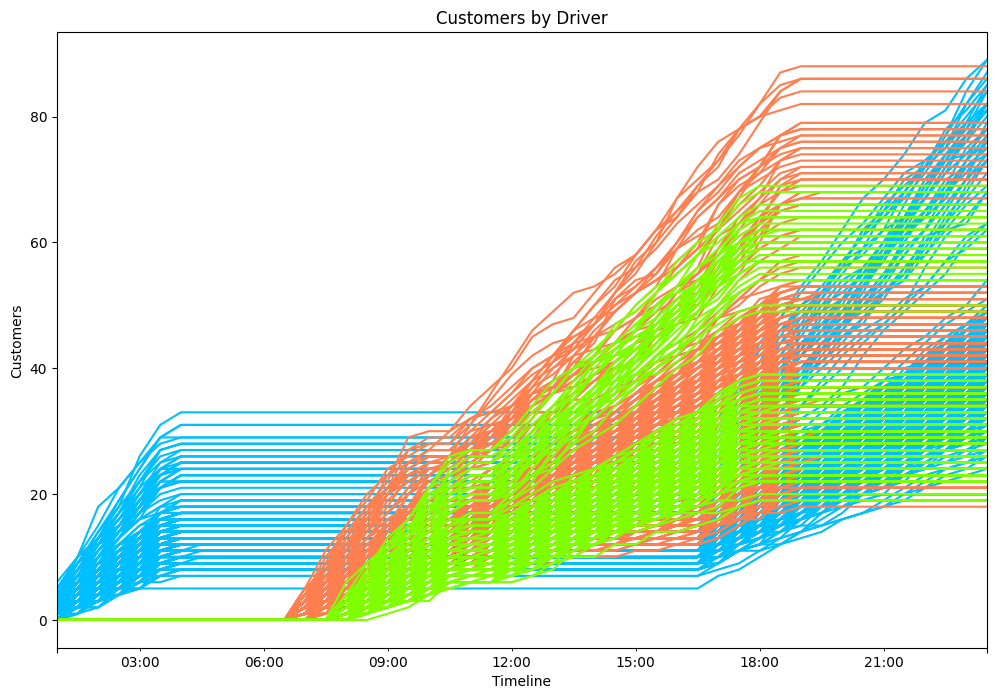

In [34]:
# set all the drivers with first letter A to be blue, B to be red, and C to be green
colors = ['deepskyblue' if driver[0] == 'A' else 'coral' if driver[0] == 'B' else 'chartreuse' for driver in eachDriverCustomers.index]
# see if the colours can be transparent

# plot customersByDriver with driver as y-axis and time as x-axis
customersByDriver = eachDriverCustomers.T.plot(figsize=(12, 8), title="Customers by Driver", xlabel="Timeline", ylabel="Customers", legend=False, color=colors)

In [35]:
# find the spread of the plot hourly

In [36]:
# group the data by driver and timestamp index, and sum up the number of customers each driver has picked up at each timestamp
eachTypeCustomers = customers_df.groupby(['archetype', pd.Grouper(key='timestamp')])['customers'].sum().unstack()

# collapse the timestamp columns into columns of 30-minute intervals
eachTypeCustomers = eachTypeCustomers.resample('30T', axis=1).sum()

for archetype, timevalues in eachTypeCustomers.iterrows(): # looping through each archetype
    customers_tracking = 0
    for index, customer_count in enumerate(timevalues):
        customers_tracking = customers_tracking + customer_count
        eachTypeCustomers.at[archetype, eachTypeCustomers.columns[index]] = customers_tracking

eachTypeCustomers

timestamp  2023-01-01 01:00:00  2023-01-01 01:30:00  2023-01-01 02:00:00   
archetype                                                                  
A                       1600.0               3496.0               5331.0  \
B                          0.0                  0.0                  0.0   
C                          0.0                  0.0                  0.0   

timestamp  2023-01-01 02:30:00  2023-01-01 03:00:00  2023-01-01 03:30:00   
archetype                                                                  
A                       7206.0               9053.0              10935.0  \
B                          0.0                  0.0                  0.0   
C                          0.0                  0.0                  0.0   

timestamp  2023-01-01 04:00:00  2023-01-01 04:30:00  2023-01-01 05:00:00   
archetype                                                                  
A                      11614.0              11617.0              11617.0  \
B                          0.0                  0.0                  0.0   
C                          0.0                  0.0                  0.0   

timestamp  2023-01-01 05:30:00  ...  2023-01-01 19:00:00  2023-01-01 19:30:00   
archetype                       ...                                             
A                      11617.0  ...              20034.0              21762.0  \
B                          0.0  ...              31666.0              31673.0   
C                          0.0  ...              26370.0              26370.0   

timestamp  2023-01-01 20:00:00  2023-01-01 20:30:00  2023-01-01 21:00:00   
archetype                                                                  
A                      23395.0              25059.0              26836.0  \
B                      31673.0              31673.0              31673.0   
C                      26370.0              26370.0              26370.0   

timestamp  2023-01-01 21:30:00  2023-01-01 22:00:00  2023-01-01 22:30:00   
archetype                                                                  
A                      28704.0              30588.0              32467.0  \
B                      31673.0              31673.0              31673.0   
C                      26370.0              26370.0              26370.0   

timestamp  2023-01-01 23:00:00  2023-01-01 23:30:00  
archetype                                            
A                      34319.0              36131.0  
B                      31673.0              31673.0  
C                      26370.0              26370.0  

[3 rows x 46 columns]

In [37]:
for driver_type, timevalues in eachTypeCustomers.iterrows(): # looping through each type
    for index, customer_count in enumerate(timevalues):
        eachTypeCustomers.at[driver_type, eachTypeCustomers.columns[index]] = customer_count / 30 / 30

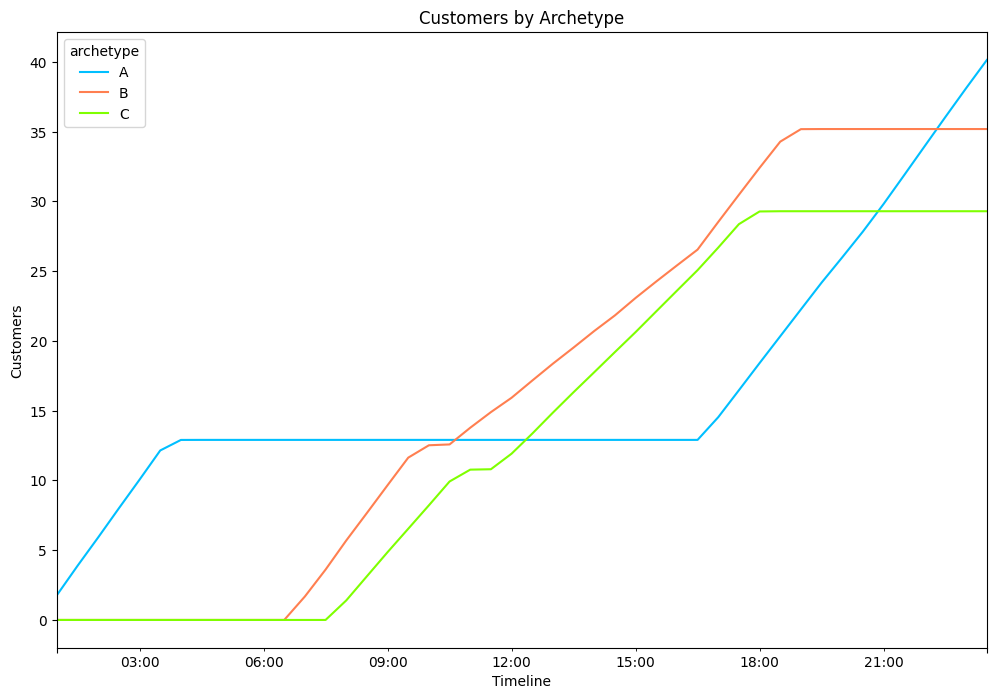

In [38]:
# set all the drivers with first letter A to be red, B to be blue, and C to be green
colors = ['deepskyblue', 'coral', 'chartreuse']

# plot customersByDriver with driver as y-axis and time as x-axis
customersByArchetype = eachTypeCustomers.T.plot(figsize=(12, 8), title="Customers by Archetype", xlabel="Timeline", ylabel="Customers", legend=True, color=colors)

In [39]:
category = 'distance'

# tailor the dataframe to a subset that concentrates on the driver's distance clocked
# initialise a key finding in seraph
seraph[category] = {
    'archetype': {},
    'driver': {},
    'trip_id': {},
    'state': {},
    'distance': {}
}

idx = 0

print(f"Building seraph[{category}]...")

if len(raw_data) > 1:
    for archetype in raw_data: # [driver_A, driver_B, driver_C]
        print(len(archetype)) # [3] archetypes * 3 * 10
        for batch in archetype: # 3 * [3] different runs * 10
            for driver in batch: # 3 * 3 * [10] drivers in each run
                print(driver['key']) # driver is a dictionary, key is the driver id
                print("total number of trips made by driver before updating: ", len(driver['log']))
                sorter = driver['key'][0] # A, B, or C
                for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
                    for event, desc in journey.items():
                        if event != 'totals':
                            seraph[category]['archetype'][idx] = driver['key'][0]
                            seraph[category]['driver'][idx] = driver['key']
                            seraph[category]['trip_id'][idx] = trip_id
                            seraph[category]['state'][idx] = event
                            seraph[category]['distance'][idx] = desc['distance']
                            idx += 1
else:
    for driver in raw_data[0]: # [3] archetypes * [3] different runs * [10] drivers in each run
        print(driver['key']) # driver is a dictionary, key is the driver id
        print("total number of trips made by driver before updating: ", len(driver['log']))
        sorter = driver['key'][0] # A, B, or C
        for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
            for event, desc in journey.items():
                if event != 'totals':
                    seraph[category]['archetype'][idx] = driver['key'][0]
                    seraph[category]['driver'][idx] = driver['key']
                    seraph[category]['trip_id'][idx] = trip_id
                    seraph[category]['state'][idx] = event
                    seraph[category]['distance'][idx] = desc['distance']
                    idx += 1

Building seraph[distance]...
30
A10
total number of trips made by driver before updating:  41
A11
total number of trips made by driver before updating:  38
A12
total number of trips made by driver before updating:  37
A13
total number of trips made by driver before updating:  44
A14
total number of trips made by driver before updating:  37
A15
total number of trips made by driver before updating:  38
A16
total number of trips made by driver before updating:  40
A17
total number of trips made by driver before updating:  38
A18
total number of trips made by driver before updating:  41
A19
total number of trips made by driver before updating:  38
A110
total number of trips made by driver before updating:  38
A111
total number of trips made by driver before updating:  37
A112
total number of trips made by driver before updating:  41
A113
total number of trips made by driver before updating:  38
A114
total number of trips made by driver before updating:  40
A115
total number of trips made b

In [40]:
distance_df = pd.DataFrame(seraph['distance'])

for letter in ['A', 'B', 'C']:
    for moving in ['searching', 'pick up', 'transit']:
        typeDistance = distance_df[distance_df['archetype'] == letter]
        typeDistance = typeDistance[typeDistance['state'] == moving]
        print("Distance travelled by drivers of type", letter, "in", moving, "state:")
        print(typeDistance.describe())
        print('---------------------------------')

Distance travelled by drivers of type A in searching state:
           distance
count  36131.000000
mean       0.764925
std        2.078742
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       49.001327
---------------------------------
Distance travelled by drivers of type A in pick up state:
           distance
count  36131.000000
mean       1.269010
std        1.197739
min        0.000000
25%        0.344526
50%        1.041577
75%        1.945407
max       30.130586
---------------------------------
Distance travelled by drivers of type A in transit state:
           distance
count  36131.000000
mean      11.657162
std        9.000966
min        0.000000
25%        4.682535
50%       10.808502
75%       17.313525
max       55.296441
---------------------------------
Distance travelled by drivers of type B in searching state:
           distance
count  31673.000000
mean       0.435381
std        1.547202
min        0.000000
25%        0.000000
50

In [41]:
distance_df

archetype driver trip_id      state   distance
0              A    A10       1  searching   0.000000
1              A    A10       1    pick up   1.944123
2              A    A10       1    transit  10.750939
3              A    A10       2  searching   0.000000
4              A    A10       2    pick up   1.409126
...          ...    ...     ...        ...        ...
282517         C   C929      36    pick up   1.736622
282518         C   C929      36    transit   5.697866
282519         C   C929      37  searching   0.000000
282520         C   C929      37    pick up   0.268260
282521         C   C929      37    transit  26.161202

[282522 rows x 5 columns]

In [42]:
sumDistancePerStateByType = distance_df.groupby(['archetype', 'state']).sum()

# divide the distance by 30 runs and 30 drivers to get the average distance travelled by each driver in each state per day
sumDistancePerStateByType['distance'] = sumDistancePerStateByType['distance'] / 30 / 30

sumDistancePerStateByType

driver   
archetype state                                                          
A         pick up    A10A10A10A10A10A10A10A10A10A10A10A10A10A10A10A...  \
          searching  A10A10A10A10A10A10A10A10A10A10A10A10A10A10A10A...   
          transit    A10A10A10A10A10A10A10A10A10A10A10A10A10A10A10A...   
B         pick up    B10B10B10B10B10B10B10B10B10B10B10B10B10B10B10B...   
          searching  B10B10B10B10B10B10B10B10B10B10B10B10B10B10B10B...   
          transit    B10B10B10B10B10B10B10B10B10B10B10B10B10B10B10B...   
C         pick up    C10C10C10C10C10C10C10C10C10C10C10C10C10C10C10C...   
          searching  C10C10C10C10C10C10C10C10C10C10C10C10C10C10C10C...   
          transit    C10C10C10C10C10C10C10C10C10C10C10C10C10C10C10C...   

                                                               trip_id   
archetype state                                                          
A         pick up    1234567891011121314151617181920212223242526272...  \
          searching  1234567891011121314151617181920212223242526272...   
          transit    1234567891011121314151617181920212223242526272...   
B         pick up    1234567891011121314151617181920212223242526272...   
          searching  1234567891011121314151617181920212223242526272...   
          transit    1234567891011121314151617181920212223242526272...   
C         pick up    1234567891011121314151617181920212223241234567...   
          searching  1234567891011121314151617181920212223241234567...   
          transit    1234567891011121314151617181920212223241234567...   

                       distance  
archetype state                  
A         pick up     50.945123  
          searching   30.708358  
          transit    467.983251  
B         pick up     42.955368  
          searching   15.322028  
          transit    451.868505  
C         pick up     54.309873  
          searching    0.000000  
          transit    418.318577

Mileage

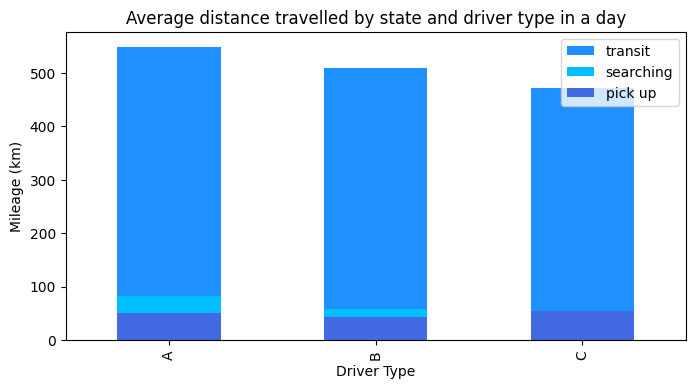

In [43]:
# 3 tone blue gradient
colors = ['royalblue', 'deepskyblue', 'dodgerblue']

# states for legend
legends = ['transit', 'searching', 'pick up']
# ordered_labels = []

# plot a stacked bar graph to show the distance travelled by each driver in each state
distancePerStateByType = sumDistancePerStateByType.unstack().plot(kind='bar', ylabel="Mileage (km)", xlabel="Driver Type", stacked=True, figsize=(8, 4), color=colors)
distancePerStateByType.set_title("Average distance travelled by state and driver type in a day")

handles, labels = distancePerStateByType.get_legend_handles_labels()
# for legend in legends:
#     for label in labels: 
#         if legend in label:
#             ordered_labels.append(legend)
#             print("Replacing", label, "with", legend)
# print("Ordered labels:", ordered_labels)
distancePerStateByType.legend(handles[::-1], legends)

In [44]:
for letter in ['A', 'B', 'C']:
    for moving in ['searching', 'pick up', 'transit']:
        # frequency of distance travelled by type A drivers in searching state      should be 0~inf [moving until passenger given]
        # frequency of distance travelled by type A drivers in pick up state        should be 0~8km [within radius, under shortest path]
        # frequency of distance travelled by type A drivers in transit state        should be 0~50km [within Singapore, under shortest path]

        # frequency of distance travelled by type B drivers in searching state      should be 0~inf [moving until passenger given]
        # frequency of distance travelled by type B drivers in pick up state        should be 0~8km [within radius, under shortest path]
        # frequency of distance travelled by type B drivers in transit state        should be 0~50km [within Singapore, under shortest path]

        # frequency of distance travelled by type C drivers in searching state      should be 0km [stationary]
        # frequency of distance travelled by type C drivers in pick up state        should be 0~8km [within radius, under shortest path]
        # frequency of distance travelled by type C drivers in transit state        should be 0~50km [within Singapore, under shortest path]

        switcher = {
            'searching': {
                'A': 30,
                'B': 30,
                'C': 0
            },
            'pick up': {
                'A': 12,
                'B': 12,
                'C': 12
            },
            'transit': {
                'A': 45,
                'B': 45,
                'C': 45
            }
        }

        limit = switcher.get(moving, lambda: "Invalid state")[letter]

        # print("Number of type", letter, moving, "drivers travelling beyond", limit, "km to make a living: ", len(distance_df[(distance_df['archetype'] == letter) & (distance_df['state'] == moving) & (distance_df['distance'] > limit)]))
        print("Number of type", letter, moving, "drivers that travelled 0 km in", moving, "state: ", len(distance_df[(distance_df['archetype'] == letter) & (distance_df['state'] == moving) & (distance_df['distance'] == 0)]))
        try:
            loserDriverRatio = len(distance_df[(distance_df['archetype'] == letter) & (distance_df['state'] == moving) & (distance_df['distance'] == 0)]) / len(distance_df[(distance_df['archetype'] == letter) & (distance_df['state'] == moving)])
        except ZeroDivisionError:
            loserDriverRatio = 0
        # print("Percentage of type", letter, moving, "drivers travelling beyond", limit, "km to make a living: ", "%.2f" % (loserDriverRatio * 100), "%")
        print("Percentage of type", letter, moving, "drivers that travelled 0 km in", moving, "state: ", "%.2f" % (loserDriverRatio * 100), "%")
        print('---------------------------------')

Number of type A searching drivers that travelled 0 km in searching state:  29731
Percentage of type A searching drivers that travelled 0 km in searching state:  82.29 %
---------------------------------
Number of type A pick up drivers that travelled 0 km in pick up state:  6008
Percentage of type A pick up drivers that travelled 0 km in pick up state:  16.63 %
---------------------------------
Number of type A transit drivers that travelled 0 km in transit state:  6022
Percentage of type A transit drivers that travelled 0 km in transit state:  16.67 %
---------------------------------
Number of type B searching drivers that travelled 0 km in searching state:  28446
Percentage of type B searching drivers that travelled 0 km in searching state:  89.81 %
---------------------------------
Number of type B pick up drivers that travelled 0 km in pick up state:  3041
Percentage of type B pick up drivers that travelled 0 km in pick up state:  9.60 %
---------------------------------
Number o

In [45]:
distance_df[(distance_df['state'] == 'searching') & (distance_df['archetype'] == 'A') & (distance_df['distance'] <= 0)]

archetype driver trip_id      state  distance
0              A    A10       1  searching       0.0
3              A    A10       2  searching       0.0
12             A    A10       5  searching       0.0
15             A    A10       6  searching       0.0
18             A    A10       7  searching       0.0
...          ...    ...     ...        ...       ...
108360         A   A929      30  searching       0.0
108369         A   A929      33  searching       0.0
108372         A   A929      34  searching       0.0
108375         A   A929      35  searching       0.0
108390         A   A929      40  searching       0.0

[29731 rows x 5 columns]

In [46]:
# dir = './visualisations/'

# for letter in ['A', 'B', 'C']:
#     for moving in ['searching', 'pick up', 'transit']:
#         typeDistance = distance_df[distance_df['archetype'] == letter]
#         typeStateDistance = typeDistance[typeDistance['state'] == moving]
#         distanceBoxPlotByStateAndType = typeStateDistance.boxplot(column=['distance'], figsize=(6, 8))
#         distanceBoxPlotByStateAndType.set_title("Distance travelled by drivers of type " + letter + " in " + moving + " state")
#         distanceBoxPlotByStateAndType.set_ylabel("Distance (km)")
#         myFig = plt.figure()
#         fname = dir + 'distanceBoxPlotByStateAndType_' + letter + '_' + moving + '.png'
#         myFig.savefig(fname, format='png')

Text(0, 0.5, 'Distance (km)')

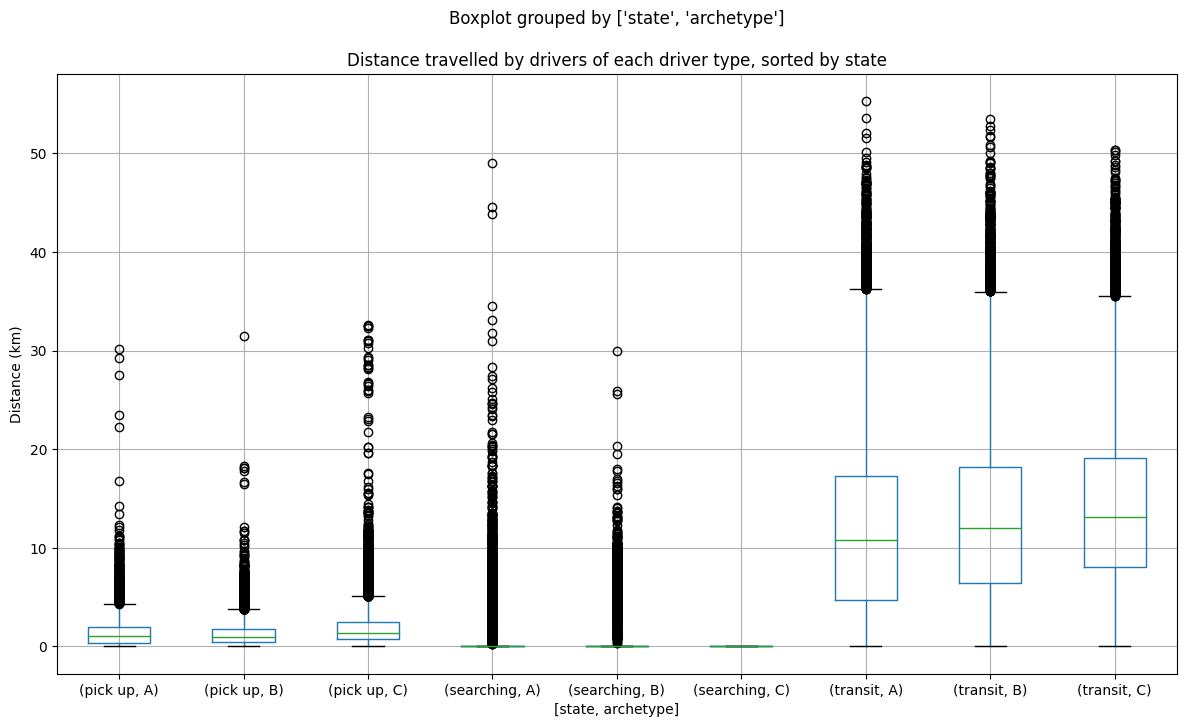

In [47]:
# plot a boxplot to compare the distance travelled with each archetype, sorted by each state
distanceBoxPlotByStateAndType = distance_df.boxplot(column=['distance'], by=['state', 'archetype'], figsize=(14, 8))
distanceBoxPlotByStateAndType.set_title("Distance travelled by drivers of each driver type, sorted by state")
distanceBoxPlotByStateAndType.set_ylabel("Distance (km)")

In [48]:
category = 'fuel'

# tailor the dataframe to a subset that concentrates on the driver's distance clocked
# initialise a key finding in seraph
seraph[category] = {
    'archetype': {},
    'driver': {},
    'trip_id': {},
    'state': {},
    'fuel_cost': {}
}

idx = 0

print(f"Building seraph[{category}]...")

if len(raw_data) > 1:
    for archetype in raw_data: # [driver_A, driver_B, driver_C]
        print(len(archetype)) # [3] archetypes * 3 * 10
        for batch in archetype: # 3 * [3] different runs * 10
            for driver in batch: # 3 * 3 * [10] drivers in each run
                print(driver['key']) # driver is a dictionary, key is the driver id
                print("total number of trips made by driver before updating: ", len(driver['log']))
                sorter = driver['key'][0] # A, B, or C
                for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
                    for event, desc in journey.items():
                        if event != 'totals':
                            seraph[category]['archetype'][idx] = driver['key'][0]
                            seraph[category]['driver'][idx] = driver['key']
                            seraph[category]['trip_id'][idx] = trip_id
                            seraph[category]['state'][idx] = event
                            seraph[category]['fuel_cost'][idx] = desc['fuelcost']
                            idx += 1
else:
    for driver in raw_data[0]: # [3] archetypes * [3] different runs * [10] drivers in each run
        print(driver['key']) # driver is a dictionary, key is the driver id
        print("total number of trips made by driver before updating: ", len(driver['log']))
        sorter = driver['key'][0] # A, B, or C
        for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
            for event, desc in journey.items():
                if event != 'totals':
                    seraph[category]['archetype'][idx] = driver['key'][0]
                    seraph[category]['driver'][idx] = driver['key']
                    seraph[category]['trip_id'][idx] = trip_id
                    seraph[category]['state'][idx] = event
                    seraph[category]['fuel_cost'][idx] = desc['fuelcost']
                    idx += 1

Building seraph[fuel]...
30
A10
total number of trips made by driver before updating:  41
A11
total number of trips made by driver before updating:  38
A12
total number of trips made by driver before updating:  37
A13
total number of trips made by driver before updating:  44
A14
total number of trips made by driver before updating:  37
A15
total number of trips made by driver before updating:  38
A16
total number of trips made by driver before updating:  40
A17
total number of trips made by driver before updating:  38
A18
total number of trips made by driver before updating:  41
A19
total number of trips made by driver before updating:  38
A110
total number of trips made by driver before updating:  38
A111
total number of trips made by driver before updating:  37
A112
total number of trips made by driver before updating:  41
A113
total number of trips made by driver before updating:  38
A114
total number of trips made by driver before updating:  40
A115
total number of trips made by dr

In [49]:
fuel_df = pd.DataFrame(seraph['fuel'])

for letter in ['A', 'B', 'C']:
    for moving in ['searching', 'pick up', 'transit']:
        typeFuel = fuel_df[fuel_df['archetype'] == letter]
        typeFuel = typeFuel[typeFuel['state'] == moving]
        print("Fuel contribution to cost for drivers of type", letter, "in", moving, "state (in dollars $):")
        print(typeFuel.describe())
        print('---------------------------------')

Fuel contribution to cost for drivers of type A in searching state (in dollars $):
          fuel_cost
count  36131.000000
mean       0.171343
std        0.465638
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       10.976297
---------------------------------
Fuel contribution to cost for drivers of type A in pick up state (in dollars $):
          fuel_cost
count  36131.000000
mean       0.284258
std        0.268294
min        0.000000
25%        0.077174
50%        0.233313
75%        0.435771
max        6.749251
---------------------------------
Fuel contribution to cost for drivers of type A in transit state (in dollars $):
          fuel_cost
count  36131.000000
mean       2.611204
std        2.016216
min        0.000000
25%        1.048888
50%        2.421104
75%        3.878230
max       12.386403
---------------------------------
Fuel contribution to cost for drivers of type B in searching state (in dollars $):
          fuel_cost
count  316

In [50]:
fuel_df

archetype driver trip_id      state  fuel_cost
0              A    A10       1  searching   0.000000
1              A    A10       1    pick up   0.435484
2              A    A10       1    transit   2.408210
3              A    A10       2  searching   0.000000
4              A    A10       2    pick up   0.315644
...          ...    ...     ...        ...        ...
282517         C   C929      36    pick up   0.389003
282518         C   C929      36    transit   1.276322
282519         C   C929      37  searching   0.000000
282520         C   C929      37    pick up   0.060090
282521         C   C929      37    transit   5.860109

[282522 rows x 5 columns]

In [51]:
sumFuelDollarsPerStateByType = fuel_df.groupby(['archetype', 'state']).sum()

# divide the distance by 30 runs and 30 drivers to get the average distance travelled by each driver in each state per day
sumFuelDollarsPerStateByType['fuel_cost'] = sumFuelDollarsPerStateByType['fuel_cost'] / 30 / 30

sumFuelDollarsPerStateByType

driver   
archetype state                                                          
A         pick up    A10A10A10A10A10A10A10A10A10A10A10A10A10A10A10A...  \
          searching  A10A10A10A10A10A10A10A10A10A10A10A10A10A10A10A...   
          transit    A10A10A10A10A10A10A10A10A10A10A10A10A10A10A10A...   
B         pick up    B10B10B10B10B10B10B10B10B10B10B10B10B10B10B10B...   
          searching  B10B10B10B10B10B10B10B10B10B10B10B10B10B10B10B...   
          transit    B10B10B10B10B10B10B10B10B10B10B10B10B10B10B10B...   
C         pick up    C10C10C10C10C10C10C10C10C10C10C10C10C10C10C10C...   
          searching  C10C10C10C10C10C10C10C10C10C10C10C10C10C10C10C...   
          transit    C10C10C10C10C10C10C10C10C10C10C10C10C10C10C10C...   

                                                               trip_id   
archetype state                                                          
A         pick up    1234567891011121314151617181920212223242526272...  \
          searching  1234567891011121314151617181920212223242526272...   
          transit    1234567891011121314151617181920212223242526272...   
B         pick up    1234567891011121314151617181920212223242526272...   
          searching  1234567891011121314151617181920212223242526272...   
          transit    1234567891011121314151617181920212223242526272...   
C         pick up    1234567891011121314151617181920212223241234567...   
          searching  1234567891011121314151617181920212223241234567...   
          transit    1234567891011121314151617181920212223241234567...   

                      fuel_cost  
archetype state                  
A         pick up     11.411708  
          searching    6.878672  
          transit    104.828248  
B         pick up      9.622002  
          searching    3.432134  
          transit    101.218545  
C         pick up     12.165412  
          searching    0.000000  
          transit     93.703361

Fuel

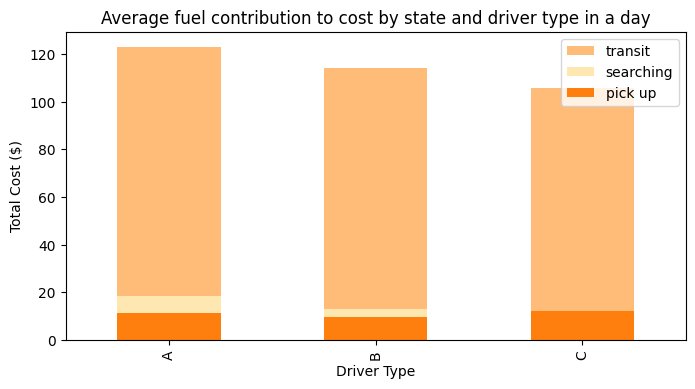

In [52]:
# 3 tone orange gradient
colors = ['#ff7f0e', '#ffe7b2', '#ffbb78']

# states for legend
legends = ['transit', 'searching', 'pick up']
# ordered_labels = []

# plot a stacked bar graph to show the distance travelled by each driver in each state
fuelDollarsPerStateByType = sumFuelDollarsPerStateByType.unstack().plot(kind='bar', ylabel="Total Cost ($)", xlabel="Driver Type", stacked=True, figsize=(8, 4), color=colors)
fuelDollarsPerStateByType.set_title("Average fuel contribution to cost by state and driver type in a day")

handles, labels = fuelDollarsPerStateByType.get_legend_handles_labels()
# for legend in legends:
#     for label in labels:
#         if legend in label:
#             ordered_labels.append(legend)
#             print("Replacing", label, "with", legend)
fuelDollarsPerStateByType.legend(handles[::-1], legends)

In [53]:
# dir = './visualisations/'

# for letter in ['A', 'B', 'C']:
#     for moving in ['searching', 'pick up', 'transit']:
#         typeFuel = fuel_df[fuel_df['archetype'] == letter]
#         typeStateFuel = typeFuel[typeFuel['state'] == moving]
#         # print("Distance travelled by drivers of type", letter, "in", moving, "state:")
#         fuelBoxPlotByStateAndType = typeStateFuel.boxplot(column=['fuel_cost'], figsize=(6, 8))
#         fuelBoxPlotByStateAndType.set_title("Fuel contribution to cost for drivers of type " + letter + " in " + moving + " state")
#         fuelBoxPlotByStateAndType.set_ylabel("Fuel Cost ($)")
#         myFig = plt.figure()
#         fname = dir + 'fuelBoxPlotByStateAndType' + letter + '_' + moving + '.png'
#         myFig.savefig(fname, format='png')

Text(0, 0.5, 'Fuel Cost ($)')

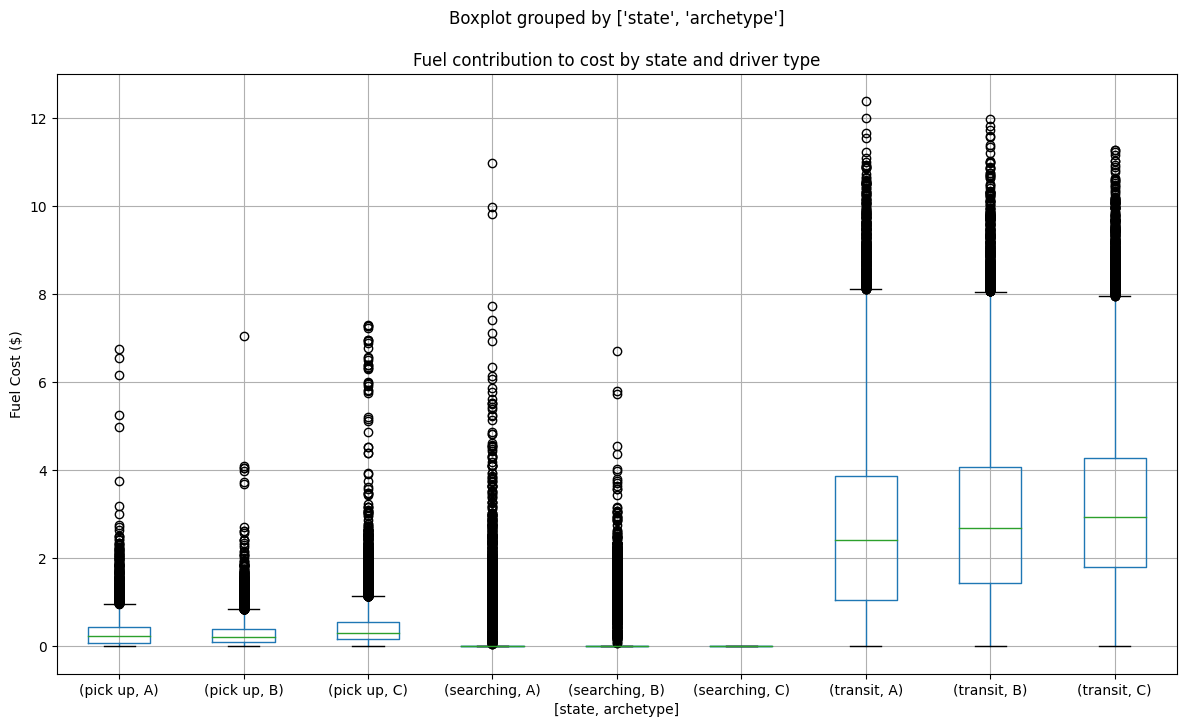

In [54]:
# plot a boxplot to compare the distance travelled with each archetype, sorted by each state
fuelBoxPlotByStateAndType = fuel_df.boxplot(column=['fuel_cost'], by=['state', 'archetype'], figsize=(14, 8))
fuelBoxPlotByStateAndType.set_title("Fuel contribution to cost by state and driver type")
fuelBoxPlotByStateAndType.set_ylabel("Fuel Cost ($)")

In [55]:
# calculate distribution of fares (similar to distance)

In [56]:
category = 'time_spent'

# tailor the dataframe to a subset that concentrates on the driver's earnings
# initialise a key finding in seraph
seraph[category] = {
    'archetype': {},
    'driver': {},
    'trip_id': {},
    'starttime': {},
    'transitstart': {},
    'endtime': {},
    'state': {},
    'time_spent': {}
}

idx = 0

print(f"Building seraph[{category}]...")

if len(raw_data) > 1:
    for archetype in raw_data: # [driver_A, driver_B, driver_C]
        print(len(archetype)) # [3] archetypes * 3 * 10
        for batch in archetype: # 3 * [3] different runs * 10
            for driver in batch: # 3 * 3 * [10] drivers in each run
                print(driver['key']) # driver is a dictionary, key is the driver id
                print("total number of trips made by driver before updating: ", len(driver['log']))
                sorter = driver['key'][0] # A, B, or C
                for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
                    for event, desc in journey.items():
                        if event != 'totals':
                            seraph[category]['archetype'][idx] = sorter
                            seraph[category]['driver'][idx] = driver['key']
                            seraph[category]['trip_id'][idx] = trip_id
                            try:
                                searchslack = journey['searching']['time spent']
                            except:
                                searchslack = 0
                            seraph[category]['starttime'][idx] = journey['searching']['current time'] - searchslack
                            seraph[category]['endtime'][idx] = journey['transit']['current time']
                            try:
                                transitslack = len(journey['transit']['speed'])
                            except:
                                transitslack = 0
                            seraph[category]['transitstart'][idx] = journey['transit']['current time'] - transitslack
                            seraph[category]['state'][idx] = event
                            seraph[category]['time_spent'][idx] = desc['time spent']
                            idx += 1
else:
    for driver in raw_data[0]: # [3] archetypes * [3] different runs * [10] drivers in each run
        print(driver['key']) # driver is a dictionary, key is the driver id
        print("total number of trips made by driver before updating: ", len(driver['log']))
        sorter = driver['key'][0] # A, B, or C
        for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
            for event, desc in journey.items():
                if event != 'totals':
                    seraph[category]['archetype'][idx] = sorter
                    seraph[category]['driver'][idx] = driver['key']
                    seraph[category]['trip_id'][idx] = trip_id
                    try:
                        searchslack = journey['searching']['time spent']
                    except:
                        searchslack = 0
                    seraph[category]['starttime'][idx] = journey['searching']['current time'] - searchslack
                    seraph[category]['endtime'][idx] = journey['transit']['current time']
                    try:
                        transitslack = len(journey['transit']['speed'])
                    except:
                        transitslack = 0
                    seraph[category]['transitstart'][idx] = journey['transit']['current time'] - transitslack
                    seraph[category]['state'][idx] = event
                    seraph[category]['time_spent'][idx] = desc['time spent']
                    idx += 1

Building seraph[time_spent]...
30
A10
total number of trips made by driver before updating:  41
A11
total number of trips made by driver before updating:  38
A12
total number of trips made by driver before updating:  37
A13
total number of trips made by driver before updating:  44
A14
total number of trips made by driver before updating:  37
A15
total number of trips made by driver before updating:  38
A16
total number of trips made by driver before updating:  40
A17
total number of trips made by driver before updating:  38
A18
total number of trips made by driver before updating:  41
A19
total number of trips made by driver before updating:  38
A110
total number of trips made by driver before updating:  38
A111
total number of trips made by driver before updating:  37
A112
total number of trips made by driver before updating:  41
A113
total number of trips made by driver before updating:  38
A114
total number of trips made by driver before updating:  40
A115
total number of trips made

In [57]:
minutes_df = pd.DataFrame(seraph['time_spent'])

for letter in ['A', 'B', 'C']:
    for moving in ['searching', 'pick up', 'transit']:
        typeMinute = minutes_df[minutes_df['archetype'] == letter]
        typeMinute = typeMinute[typeMinute['state'] == moving]
        print("Time spent by drivers of type", letter, "in", moving, "state (in minutes):")
        print(typeMinute['time_spent'].describe())
        print('---------------------------------')

Time spent by drivers of type A in searching state (in minutes):
count    36131.000000
mean         0.828151
std          2.010776
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.751185
Name: time_spent, dtype: float64
---------------------------------
Time spent by drivers of type A in pick up state (in minutes):
count    36131.000000
mean         1.035151
std          0.981077
min          0.000000
25%          0.279283
50%          0.846473
75%          1.586410
max         26.902309
Name: time_spent, dtype: float64
---------------------------------
Time spent by drivers of type A in transit state (in minutes):
count    36131.000000
mean         9.522549
std          7.418646
min          0.000000
25%          3.775067
50%          8.788691
75%         14.150578
max         45.448445
Name: time_spent, dtype: float64
---------------------------------
Time spent by drivers of type B in searching state (in minutes):
count    31673.

Time Spend

Text(0, 0.5, 'Time spent (minutes)')

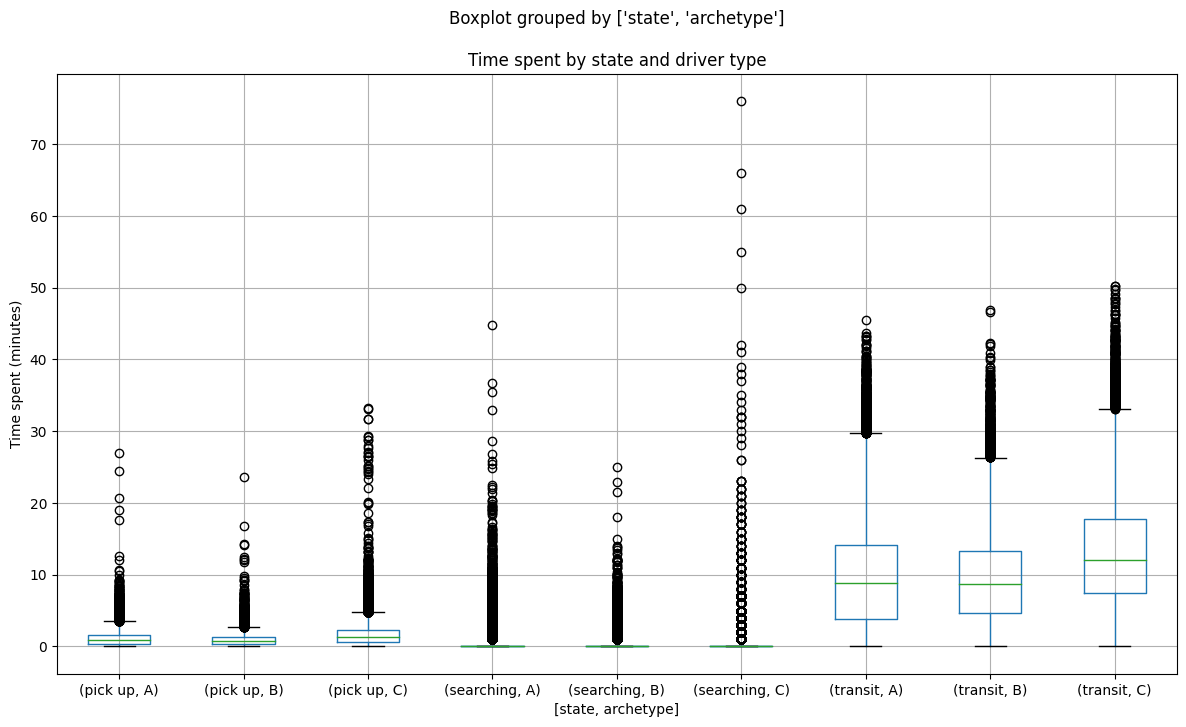

In [58]:
# plot a boxplot to compare the distance travelled with each archetype, sorted by each state
timeSpentBoxPlotByStateAndType = minutes_df.boxplot(column=['time_spent'], by=['state', 'archetype'], figsize=(14, 8))
timeSpentBoxPlotByStateAndType.set_title("Time spent by state and driver type")
timeSpentBoxPlotByStateAndType.set_ylabel("Time spent (minutes)")

In [59]:
hitrate_df = minutes_df[minutes_df['state'] == "searching"]

hitrate_df

archetype driver trip_id  starttime  transitstart  endtime      state   
0              A    A10       1       61.0            64       74  searching  \
3              A    A10       2       77.0            78       87  searching   
6              A    A10       3       90.0            98       99  searching   
9              A    A10       4       99.0           105      106  searching   
12             A    A10       5      108.0           108      111  searching   
...          ...    ...     ...        ...           ...      ...        ...   
282507         C   C929      33      989.0           999     1003  searching   
282510         C   C929      34     1005.0          1008     1037  searching   
282513         C   C929      35     1039.0          1040     1058  searching   
282516         C   C929      36     1060.0          1062     1067  searching   
282519         C   C929      37     1069.0          1070     1093  searching   

        time_spent  
0              1.0  
3              0.0  
6              5.0  
9              5.0  
12             0.0  
...            ...  
282507         5.0  
282510         0.0  
282513         0.0  
282516         0.0  
282519         0.0  

[94174 rows x 8 columns]

In [60]:
peakOne = range(420, 600) # 7am - 10am
peakTwo = range(1020, 1200) # 5pm - 8pm

hitrate_df['peak'] = np.where(hitrate_df['transitstart'].isin(peakOne) | hitrate_df['transitstart'].isin(peakTwo), 'peak', 'npeak')

# hitrate = 1 / time spent, set all inf to 0
hitrate_df['hitrate'] = 1 / hitrate_df['time_spent']
hitrate_df['hitrate'] = hitrate_df['hitrate'].replace([np.inf, -np.inf], 0)

C:\Users\User\AppData\Local\Temp\ipykernel_28832\3237194047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hitrate_df['peak'] = np.where(hitrate_df['transitstart'].isin(peakOne) | hitrate_df['transitstart'].isin(peakTwo), 'peak', 'npeak')
C:\Users\User\AppData\Local\Temp\ipykernel_28832\3237194047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hitrate_df['hitrate'] = 1 / hitrate_df['time_spent']
C:\Users\User\AppData\Local\Temp\ipykernel_28832\3237194047.py:8: SettingWithCopyWarning: 
A value is t

In [61]:
hitrate_df[340:400]

archetype driver trip_id    starttime  transitstart  endtime      state   
1020         A    A18      28  1203.000000          1205     1242  searching  \
1023         A    A18      29  1243.000000          1245     1280  searching   
1026         A    A18      30  1281.000000          1285     1286  searching   
1029         A    A18      31  1290.000000          1290     1312  searching   
1032         A    A18      32  1316.000000          1318     1322  searching   
1035         A    A18      33  1324.000000          1327     1332  searching   
1038         A    A18      34  1333.000000          1333     1344  searching   
1041         A    A18      35  1346.000000          1347     1355  searching   
1044         A    A18      36  1360.000000          1362     1365  searching   
1047         A    A18      37  1366.000000          1368     1372  searching   
1050         A    A18      38  1377.000000          1381     1382  searching   
1053         A    A18      39  1384.000000          1383     1386  searching   
1056         A    A18      40  1390.000000          1392     1419  searching   
1059         A    A18      41  1421.000000          1427     1428  searching   
1062         A    A19       1    61.000000            64       73  searching   
1065         A    A19       2    76.000000            77       92  searching   
1068         A    A19       3    95.000000           101      102  searching   
1071         A    A19       4   103.000000           107      119  searching   
1074         A    A19       5   122.000000           124      131  searching   
1077         A    A19       6   132.000000           137      147  searching   
1080         A    A19       7   149.000000           152      154  searching   
1083         A    A19       8   156.000000           157      161  searching   
1086         A    A19       9   162.000000           164      166  searching   
1089         A    A19      10   169.000000           171      180  searching   
1092         A    A19      11   183.000000           183      191  searching   
1095         A    A19      12   192.000000           194      212  searching   
1098         A    A19      13   215.000000           216      240  searching   
1101         A    A19      14  1021.000000          1021     1027  searching   
1104         A    A19      15  1027.000000          1030     1045  searching   
1107         A    A19      16  1046.000000          1048     1069  searching   
1110         A    A19      17  1072.000000          1072     1082  searching   
1113         A    A19      18  1084.000000          1085     1101  searching   
1116         A    A19      19  1102.000000          1105     1124  searching   
1119         A    A19      20  1126.000000          1127     1139  searching   
1122         A    A19      21  1140.000000          1146     1162  searching   
1125         A    A19      22  1164.000000          1163     1174  searching   
1128         A    A19      23  1176.000000          1177     1192  searching   
1131         A    A19      24  1193.000000          1194     1197  searching   
1134         A    A19      25  1202.000000          1201     1213  searching   
1137         A    A19      26  1216.000000          1218     1237  searching   
1140         A    A19      27  1238.000000          1239     1256  searching   
1143         A    A19      28  1259.000000          1261     1277  searching   
1146         A    A19      29  1279.000000          1280     1287  searching   
1149         A    A19      30  1289.000000          1292     1317  searching   
1152         A    A19      31  1320.635959          1333     1334  searching   
1155         A    A19      32  1334.000000          1341     1350  searching   
1158         A    A19      33  1352.000000          1349     1357  searching   
1161         A    A19      34  1361.410658          1366     1367  searching   
1164         A    A19      35  1370.000000          1374     1375  searching   
1167 

In [62]:
hitrate_move_p_df = hitrate_df[(hitrate_df['archetype'] == 'A') | (hitrate_df['archetype'] == 'B') & (hitrate_df['peak'] == 'peak')]
hitrate_move_np_df = hitrate_df[(hitrate_df['archetype'] == 'A') | (hitrate_df['archetype'] == 'B') & (hitrate_df['peak'] == 'npeak')]
hitrate_nomove_p_df = hitrate_df[(hitrate_df['archetype'] == 'C') & (hitrate_df['peak'] == 'peak')]
hitrate_nomove_np_df = hitrate_df[(hitrate_df['archetype'] == 'C') & (hitrate_df['peak'] == 'npeak')]

all_hitrate_df = {
    "peak hour as a moving": hitrate_move_p_df,
    "peak hour as a non-moving": hitrate_nomove_p_df,
    "non-peak hour as a moving": hitrate_move_np_df,
    "non-peak hour as a non-moving": hitrate_nomove_np_df
}

In [63]:
hitrate_nomove_p_df[0:40]

archetype driver trip_id  starttime  transitstart  endtime      state   
203412         C    C10       1      480.0           481      514  searching  \
203415         C    C10       2      516.0           517      521  searching   
203418         C    C10       3      523.0           525      550  searching   
203421         C    C10       4      552.0           553      587  searching   
203424         C    C10       5      589.0           590      612  searching   
203475         C    C10      22     1028.0          1029     1045  searching   
203478         C    C10      23     1047.0          1048     1076  searching   
203481         C    C10      24     1078.0          1079     1096  searching   
203484         C    C11       1      480.0           482      502  searching   
203487         C    C11       2      504.0           505      521  searching   
203490         C    C11       3      523.0           525      531  searching   
203493         C    C11       4      533.0           537      557  searching   
203496         C    C11       5      559.0           561      569  searching   
203499         C    C11       6      571.0           574      587  searching   
203502         C    C11       7      589.0           590      607  searching   
203556         C    C11      25     1029.0          1032     1039  searching   
203559         C    C11      26     1041.0          1043     1054  searching   
203562         C    C11      27     1056.0          1058     1062  searching   
203565         C    C11      28     1064.0          1066     1075  searching   
203568         C    C11      29     1077.0          1078     1082  searching   
203571         C    C12       1      480.0           481      502  searching   
203574         C    C12       2      504.0           506      531  searching   
203577         C    C12       3      533.0           534      537  searching   
203580         C    C12       4      539.0           540      553  searching   
203583         C    C12       5      555.0           556      563  searching   
203586         C    C12       6      565.0           566      586  searching   
203589         C    C12       7      588.0           590      608  searching   
203640         C    C12      24     1020.0          1021     1044  searching   
203643         C    C12      25     1046.0          1049     1078  searching   
203646         C    C12      26     1080.0          1081     1092  searching   
203649         C    C13       1      480.0           482      488  searching   
203652         C    C13       2      490.0           491      502  searching   
203655         C    C13       3      504.0           507      522  searching   
203658         C    C13       4      524.0           526      552  searching   
203661         C    C13       5      554.0           556      585  searching   
203664         C    C13       6      587.0           588      603  searching   
203730         C    C13      28     1024.0          1025     1029  searching   
203733         C    C13      29     1031.0          1032     1039  searching   
203736         C    C13      30     1041.0          1042     1052  searching   
203739         C    C13      31     1054.0          1057     1062  searching   

        time_spent  peak  hitrate  
203412         0.0  peak      0.0  
203415         0.0  peak      0.0  
203418         0.0  peak      0.0  
203421         0.0  peak      0.0  
203424         0.0  peak      0.0  
203475         0.0  peak      0.0  
203478         0.0  peak      0.0  
203481         0.0  peak      0.0  
203484         0.0  peak      0.0  
203487         0.0  peak      0.0  
203490         0.0  peak      0.0  
203493         0.0  peak      0.0  
203496         0.0  peak      0.0  
203499         0.0  peak      0.0  
203502         0.0  peak      0.0  
203556         0.0  peak      0.0  
203559         0.0  peak      0.0  
203562         0.0  peak      0.0  
203565         0.0  peak      0.0  
203568

In [64]:
for desc, hitrate_df in all_hitrate_df.items():
    print('Chances of getting a passenger during', desc, 'driver: ')
    print(hitrate_df['hitrate'].describe())
    print('---------------------------------')

Chances of getting a passenger during peak hour as a moving driver: 
count    54574.000000
mean         0.051090
std          0.159776
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hitrate, dtype: float64
---------------------------------
Chances of getting a passenger during peak hour as a non-moving driver: 
count    9784.000000
mean        0.009397
std         0.068848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hitrate, dtype: float64
---------------------------------
Chances of getting a passenger during non-peak hour as a moving driver: 
count    49361.00000
mean         0.07885
std          0.19313
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: hitrate, dtype: float64
---------------------------------
Chances of getting a passenger during non-peak hour as a non-moving driver: 
coun

In [65]:
# get the percentage difference in the mean statistics, weighted by count, when comparing within peak and non-peak hours, between moving and non-moving drivers
print('Percentage difference of getting a passenger during peak hours as a moving driver compared to non-moving driver: ')
print("%.2f" % ((hitrate_move_p_df['hitrate'].mean() - hitrate_nomove_p_df['hitrate'].mean()) / hitrate_nomove_p_df['hitrate'].mean() * 100), '%')
print('---------------------------------')

print('Percentage difference of getting a passenger during non-peak hours as a moving driver compared to non-moving driver: ')
print("%.2f" % ((hitrate_move_np_df['hitrate'].mean() - hitrate_nomove_np_df['hitrate'].mean()) / hitrate_nomove_np_df['hitrate'].mean() * 100), '%')
print('---------------------------------')

Percentage difference of getting a passenger during peak hours as a moving driver compared to non-moving driver: 
443.70 %
---------------------------------
Percentage difference of getting a passenger during non-peak hours as a moving driver compared to non-moving driver: 
-1.97 %
---------------------------------


In [66]:
category = 'meta_stats'

# tailor the dataframe to a subset that concentrates on the driver's earnings
# initialise a key finding in seraph
seraph[category] = {
    'archetype': {},
    'driver': {},
    'trip_id': {},
    'starttime': {},
    'searchstart': {},
    'pickupstart': {},
    'transitstart': {},
    'endtime': {},
    'state': {},
    'time_spent': {}
}

idx = 0

print(f"Building seraph[{category}]...")

if len(raw_data) > 1:
    for archetype in raw_data: # [driver_A, driver_B, driver_C]
        print(len(archetype)) # [3] archetypes * 3 * 10
        for batch in archetype: # 3 * [3] different runs * 10
            for driver in batch: # 3 * 3 * [10] drivers in each run
                print(driver['key']) # driver is a dictionary, key is the driver id
                print("total number of trips made by driver before updating: ", len(driver['log']))
                sorter = driver['key'][0] # A, B, or C
                for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
                    for event, desc in journey.items():
                        if event != 'totals':
                            seraph[category]['archetype'][idx] = sorter
                            seraph[category]['driver'][idx] = driver['key']
                            seraph[category]['trip_id'][idx] = trip_id
                            try:
                                searchslack = journey['searching']['time spent']
                            except:
                                searchslack = 0
                            seraph[category]['starttime'][idx] = journey['searching']['current time'] - searchslack
                            seraph[category]['searchstart'][idx] = seraph[category]['starttime'][idx]
                            seraph[category]['pickupstart'][idx] = journey['searching']['current time']
                            seraph[category]['transitstart'][idx] = journey['pick up']['current time']
                            seraph[category]['endtime'][idx] = journey['transit']['current time']
                            seraph[category]['state'][idx] = event
                            seraph[category]['time_spent'][idx] = desc['time spent']
                            idx += 1
else:
    for driver in raw_data[0]: # [3] archetypes * [3] different runs * [10] drivers in each run
        print(driver['key']) # driver is a dictionary, key is the driver id
        print("total number of trips made by driver before updating: ", len(driver['log']))
        sorter = driver['key'][0] # A, B, or C
        for trip_id, journey in driver['log'].items(): # log is a dict of trips the driver made for X recorded days
            for event, desc in journey.items():
                if event != 'totals':
                    seraph[category]['archetype'][idx] = sorter
                    seraph[category]['driver'][idx] = driver['key']
                    seraph[category]['trip_id'][idx] = trip_id
                    try:
                        searchslack = journey['searching']['time spent']
                    except:
                        searchslack = 0
                    seraph[category]['starttime'][idx] = journey['searching']['current time'] - searchslack
                    seraph[category]['searchstart'][idx] = seraph[category]['starttime'][idx]
                    seraph[category]['pickupstart'][idx] = journey['searching']['current time']
                    seraph[category]['transitstart'][idx] = journey['pick up']['current time']
                    seraph[category]['endtime'][idx] = journey['transit']['current time']
                    seraph[category]['state'][idx] = event
                    seraph[category]['time_spent'][idx] = desc['time spent']
                    idx += 1

Building seraph[meta_stats]...
30
A10
total number of trips made by driver before updating:  41
A11
total number of trips made by driver before updating:  38
A12
total number of trips made by driver before updating:  37
A13
total number of trips made by driver before updating:  44
A14
total number of trips made by driver before updating:  37
A15
total number of trips made by driver before updating:  38
A16
total number of trips made by driver before updating:  40
A17
total number of trips made by driver before updating:  38
A18
total number of trips made by driver before updating:  41
A19
total number of trips made by driver before updating:  38
A110
total number of trips made by driver before updating:  38
A111
total number of trips made by driver before updating:  37
A112
total number of trips made by driver before updating:  41
A113
total number of trips made by driver before updating:  38
A114
total number of trips made by driver before updating:  40
A115
total number of trips made

In [67]:
timeline_df = pd.DataFrame(seraph['meta_stats'])

timeline_df

archetype driver trip_id  starttime  searchstart  pickupstart   
0              A    A10       1       61.0         61.0           62  \
1              A    A10       1       61.0         61.0           62   
2              A    A10       1       61.0         61.0           62   
3              A    A10       2       77.0         77.0           77   
4              A    A10       2       77.0         77.0           77   
...          ...    ...     ...        ...          ...          ...   
282517         C   C929      36     1060.0       1060.0         1060   
282518         C   C929      36     1060.0       1060.0         1060   
282519         C   C929      37     1069.0       1069.0         1069   
282520         C   C929      37     1069.0       1069.0         1069   
282521         C   C929      37     1069.0       1069.0         1069   

        transitstart  endtime      state  time_spent  
0                 64       74  searching    1.000000  
1                 64       74    pick up    1.735824  
2                 64       74    transit    9.599053  
3                 80       87  searching    0.000000  
4                 80       87    pick up    1.258148  
...              ...      ...        ...         ...  
282517          1062     1067    pick up    1.488533  
282518          1062     1067    transit    4.883885  
282519          1070     1093  searching    0.000000  
282520          1070     1093    pick up    0.229937  
282521          1070     1093    transit   22.423887  

[282522 rows x 10 columns]

In [68]:
timeline_df['ticked'] = np.ceil(timeline_df['time_spent'])

# ticked records each time spent in each state, rounded up to the nearest minute
for idx, row in timeline_df.iterrows():
    if row['state'] == 'searching':
        timeline_df.loc[idx, 'ticked'] = timeline_df.loc[idx, 'searchstart']
    elif row['state'] == 'pick up':
        timeline_df.loc[idx, 'ticked'] = timeline_df.loc[idx, 'pickupstart']
    elif row['state'] == 'transit':
        timeline_df.loc[idx, 'ticked'] = timeline_df.loc[idx, 'transitstart']

In [69]:
timeline_df

archetype driver trip_id  starttime  searchstart  pickupstart   
0              A    A10       1       61.0         61.0           62  \
1              A    A10       1       61.0         61.0           62   
2              A    A10       1       61.0         61.0           62   
3              A    A10       2       77.0         77.0           77   
4              A    A10       2       77.0         77.0           77   
...          ...    ...     ...        ...          ...          ...   
282517         C   C929      36     1060.0       1060.0         1060   
282518         C   C929      36     1060.0       1060.0         1060   
282519         C   C929      37     1069.0       1069.0         1069   
282520         C   C929      37     1069.0       1069.0         1069   
282521         C   C929      37     1069.0       1069.0         1069   

        transitstart  endtime      state  time_spent  ticked  
0                 64       74  searching    1.000000    61.0  
1                 64       74    pick up    1.735824    62.0  
2                 64       74    transit    9.599053    64.0  
3                 80       87  searching    0.000000    77.0  
4                 80       87    pick up    1.258148    77.0  
...              ...      ...        ...         ...     ...  
282517          1062     1067    pick up    1.488533  1060.0  
282518          1062     1067    transit    4.883885  1062.0  
282519          1070     1093  searching    0.000000  1069.0  
282520          1070     1093    pick up    0.229937  1069.0  
282521          1070     1093    transit   22.423887  1070.0  

[282522 rows x 11 columns]

In [70]:
# build a column of timestamps using seraph['customers']['endtime'] for customers_df, with a frequency of 1 minute, and a start time of 0, timeline from 2023-01-01 00:00:00 onwards
timeline_df['timestamp'] = pd.to_datetime(timeline_df['ticked'], unit='m', origin='2023-01-01 00:00:00')

timeline_df

archetype driver trip_id  starttime  searchstart  pickupstart   
0              A    A10       1       61.0         61.0           62  \
1              A    A10       1       61.0         61.0           62   
2              A    A10       1       61.0         61.0           62   
3              A    A10       2       77.0         77.0           77   
4              A    A10       2       77.0         77.0           77   
...          ...    ...     ...        ...          ...          ...   
282517         C   C929      36     1060.0       1060.0         1060   
282518         C   C929      36     1060.0       1060.0         1060   
282519         C   C929      37     1069.0       1069.0         1069   
282520         C   C929      37     1069.0       1069.0         1069   
282521         C   C929      37     1069.0       1069.0         1069   

        transitstart  endtime      state  time_spent  ticked   
0                 64       74  searching    1.000000    61.0  \
1                 64       74    pick up    1.735824    62.0   
2                 64       74    transit    9.599053    64.0   
3                 80       87  searching    0.000000    77.0   
4                 80       87    pick up    1.258148    77.0   
...              ...      ...        ...         ...     ...   
282517          1062     1067    pick up    1.488533  1060.0   
282518          1062     1067    transit    4.883885  1062.0   
282519          1070     1093  searching    0.000000  1069.0   
282520          1070     1093    pick up    0.229937  1069.0   
282521          1070     1093    transit   22.423887  1070.0   

                 timestamp  
0      2023-01-01 01:01:00  
1      2023-01-01 01:02:00  
2      2023-01-01 01:04:00  
3      2023-01-01 01:17:00  
4      2023-01-01 01:17:00  
...                    ...  
282517 2023-01-01 17:40:00  
282518 2023-01-01 17:42:00  
282519 2023-01-01 17:49:00  
282520 2023-01-01 17:49:00  
282521 2023-01-01 17:50:00  

[282522 rows x 12 columns]

In [71]:
# peek at customers_df where timestamp is 2023-01-01 00:00:00
timeline_df[timeline_df['timestamp'] == '2023-01-01 09:28:00']

archetype driver trip_id  starttime  searchstart  pickupstart   
108675         B    B13       6      568.0        568.0          568  \
108676         B    B13       6      568.0        568.0          568   
110268         B   B122       4      568.0        568.0          568   
110269         B   B122       4      568.0        568.0          568   
110873         B   B129       7      566.0        566.0          566   
...          ...    ...     ...        ...          ...          ...   
277560         C    C82       6      568.0        568.0          568   
277561         C    C82       6      568.0        568.0          568   
277812         C    C85       8      568.0        568.0          572   
279575         C   C827       6      566.0        566.0          566   
280619         C    C99       7      562.0        562.0          566   

        transitstart  endtime      state  time_spent  ticked   
108675           569      574  searching    0.000000   568.0  \
108676           569      574    pick up    0.532771   568.0   
110268           569      590  searching    0.000000   568.0   
110269           569      590    pick up    0.017313   568.0   
110873           568      595    transit   26.760902   568.0   
...              ...      ...        ...         ...     ...   
277560           570      575  searching    0.000000   568.0   
277561           570      575    pick up    1.336325   568.0   
277812           576      595  searching    4.000000   568.0   
279575           568      588    transit   19.691984   568.0   
280619           568      578    transit    9.548573   568.0   

                 timestamp  
108675 2023-01-01 09:28:00  
108676 2023-01-01 09:28:00  
110268 2023-01-01 09:28:00  
110269 2023-01-01 09:28:00  
110873 2023-01-01 09:28:00  
...                    ...  
277560 2023-01-01 09:28:00  
277561 2023-01-01 09:28:00  
277812 2023-01-01 09:28:00  
279575 2023-01-01 09:28:00  
280619 2023-01-01 09:28:00  

[328 rows x 12 columns]

In [72]:
eachDriverState = timeline_df.groupby([pd.Grouper(key='timestamp'), 'state'])['driver'].sum().unstack()

eachDriverState[0:40]

state                                                                    pick up   
timestamp                                                                          
2023-01-01 01:00:00.000000000                                                NaN  \
2023-01-01 01:01:00.000000000  A11A16A17A110A112A116A118A119A126A127A101A103A...   
2023-01-01 01:01:03.392712704                                                NaN   
2023-01-01 01:01:06.650018304                                                NaN   
2023-01-01 01:01:07.648695296                                                NaN   
2023-01-01 01:01:10.312389632                                                NaN   
2023-01-01 01:01:10.750842368                                                NaN   
2023-01-01 01:01:10.818507264                                                NaN   
2023-01-01 01:01:10.951004672                                                NaN   
2023-01-01 01:01:11.516457984                                                NaN   
2023-01-01 01:01:12.923494144                                                NaN   
2023-01-01 01:01:13.248147456                                                NaN   
2023-01-01 01:01:13.335054080                                                NaN   
2023-01-01 01:01:14.360121600                                                NaN   
2023-01-01 01:01:15.128645888                                                NaN   
2023-01-01 01:01:16.020956160                                                NaN   
2023-01-01 01:01:16.413714688                                                NaN   
2023-01-01 01:01:16.993132032                                                NaN   
2023-01-01 01:01:18.585536000                                                NaN   
2023-01-01 01:01:18.619714048                                                NaN   
2023-01-01 01:01:18.936036096                                                NaN   
2023-01-01 01:01:21.199783424                                                NaN   
2023-01-01 01:01:21.838313984                                                NaN   
2023-01-01 01:01:21.906448128                                                NaN   
2023-01-01 01:01:23.703009792                                                NaN   
2023-01-01 01:01:24.111904768                                                NaN   
2023-01-01 01:01:24.505102080                                                NaN   
2023-01-01 01:01:25.281480960                                                NaN   
2023-01-01 01:01:26.976004608                                                NaN   
2023-01-01 01:01:30.824822528                                                NaN   
2023-01-01 01:01:31.835068672                                                NaN   
2023-01-01 01:01:34.836850432                                                NaN   
2023-01-01 01:01:36.164093952                                                NaN   
2023-01-01 01:01:36.399623936                                                NaN   
2023-01-01 01:01:37.637601024                                                NaN   
2023-01-01 01:01:37.684918016                                                NaN   
2023-01-01 01:01:44.371413248                                                NaN   
2023-01-01 01:01:44.930244864                                                NaN   
2023-01-01 01:01:45.354330368                                                NaN   
2023-01-01 01:01:45.514138624                                                NaN   

state                                                                  searching   
timestamp                                                                          
2023-01-01 01:00:00.000000000                                           A811A826  \
2023-01-01 01:01:00.000000000  A10A11A12A14A15A16A17A18A19A110A111A112A113A11...   
2023-01-01 01:01:03.392712704                                               A719   
2023-01-01 01:01:06.650018304                      

In [73]:
for timestamp, statesvalue in eachDriverState.iterrows():
    for state, drivers in enumerate(statesvalue):
        if pd.isnull(drivers):
            print(state+1, "of", len(statesvalue), 'of index', timestamp, 'is empty, filling with 0...')
            eachDriverState.at[timestamp, eachDriverState.columns[state]] = 0
        else:
            count = re.split('A|B|C', drivers)
            print(state+1, "of", len(statesvalue), 'of index', timestamp, 'has driver(s), filling with numbers...')
            print('Drivers splitted: ', count[1:])
            print('Total number of drivers in this state: ', len(count)-1)
            eachDriverState.at[timestamp, eachDriverState.columns[state]] = len(count)-1
    print('-----------------')

1 of 3 of index 2023-01-01 01:00:00 is empty, filling with 0...
2 of 3 of index 2023-01-01 01:00:00 has driver(s), filling with numbers...
Drivers splitted:  ['811', '826']
Total number of drivers in this state:  2
3 of 3 of index 2023-01-01 01:00:00 is empty, filling with 0...
-----------------
1 of 3 of index 2023-01-01 01:01:00 has driver(s), filling with numbers...
Drivers splitted:  ['11', '16', '17', '110', '112', '116', '118', '119', '126', '127', '101', '103', '104', '105', '106', '107', '109', '1010', '1011', '1012', '1017', '1019', '1020', '1021', '1022', '1024', '1026', '1027', '114', '115', '116', '117', '118', '1110', '1112', '1114', '1116', '1118', '1121', '1122', '1123', '1124', '1127', '120', '122', '123', '127', '129', '1211', '1213', '1215', '1217', '1221', '1222', '1226', '1228', '1229', '1322', '140', '141', '142', '144', '145', '146', '147', '148', '1410', '1412', '1413', '1416', '1419', '1420', '1421', '1424', '1426', '1427', '1428', '1429', '150', '152', '154', '

In [74]:
# driver_occupied = eachDriverState['pick up'] + eachDriverState['transit']
# all_drivers = eachDriverState['searching'] + eachDriverState['pick up'] + eachDriverState['transit']

# try:
#     driver_occupancy = driver_occupied / all_drivers
# except:
#     driver_occupancy = 0

# eachDriverState['driver_occupancy'] = 0

# for timestamp, statesvalue in eachDriverState.iterrows(): # looping through each driver
#     driver_occupied = statesvalue['pick up'] + statesvalue['transit']
#     all_drivers = statesvalue['searching'] + statesvalue['pick up'] + statesvalue['transit']
#     try:
#         driver_occupancy = driver_occupied / all_drivers
#     except:
#         driver_occupancy = 0
#     eachTypeCustomers.at[archetype, eachTypeCustomers.columns['driver_occupancy']] = driver_occupancy
 
# eachTypeCustomers